In [1]:
import pandas as pd
import json

In [2]:
# Load the original dataframe
df = pd.read_csv('resume_with_job_description.csv')
df.head(2)

,id,content,jobDescription
0,clg43d9an007gx02ug1i694j6,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Job Posting:\nDo you have a passion for helpin...
1,clg3itetj006jx92tdkcrw195,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Tasks:\n\nCreation of concepts for dashboard i...


In [3]:
# Apply the function to the JSON column
df['json_dict'] = df['content'].apply(lambda x: json.loads(x))
df_json = pd.json_normalize(df['json_dict'])
df_json.head(2)

,keywords,suggestedSkills,awards.awards,header.role,header.contact.city,header.contact.state,header.contact.country,skills.skills,summary.text,summary.visible,...,projects.projects,education.education,volunteer.volunteer,experience.experience,references.references,publications.publications,certifications.certifications,accomplishments.text,accomplishments.visible,accomplishments.diffedText
0,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",[],,INDIO,CA,United States,"[{'section': 'Jobber, Glorilladesk, Billmaster...","Detailed and driven, I have built strong commu...",True,...,[],"[{'GPA': '', 'minor': '', 'awards': 'Dean's Li...",[],"[{'title': 'Lead IPM Technician III', 'company...",[],[],"[{'name': 'Qualified Applicator Certificate', ...",,True,
1,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",[],,Ilmenau,Thuringia,Germany,"[{'section': 'User research methodologies, Inf...",Detailed-oriented UI/UX Designer with experien...,True,...,"[{'link': '', 'title': 'Madinar Pathe App Desi...","[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'UI/UX Designer', 'company': 'Dezzl...",[],[],[{'name': 'Google UX Design - Foundation of UX...,,True,


In [4]:
# Drop the original JSON column and merge the new dataframe
df = df.drop('content', axis=1)
df = df.drop('json_dict', axis=1)
df = pd.concat([df, df_json], axis=1)
df.columns

Index(['id', 'jobDescription', 'keywords', 'suggestedSkills', 'awards.awards',
       'header.role', 'header.contact.city', 'header.contact.state',
       'header.contact.country', 'skills.skills', 'summary.text',
       'summary.visible', 'summary.diffedText', 'projects.projects',
       'education.education', 'volunteer.volunteer', 'experience.experience',
       'references.references', 'publications.publications',
       'certifications.certifications', 'accomplishments.text',
       'accomplishments.visible', 'accomplishments.diffedText'],
      dtype='object')

In [5]:
df_education=pd.json_normalize(df.loc[:,'education.education'])
df_education.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,"{'GPA': '', 'minor': '', 'awards': 'Dean's Lis...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'GPA': '', 'minor': '', 'awards': '', 'school...","{'GPA': '', 'minor': '', 'awards': '', 'school...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'GPA': '3.61/4.00', 'minor': 'Computer Scienc...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"{'GPA': '', 'minor': 'Digital Marketing', 'awa...","{'GPA': '3.58', 'minor': 'Mechanical Engineeri...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{'GPA': '', 'minor': '', 'awards': '', 'school...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
print(df_education[5].isna().sum(), len(df_education))

11965 11976


In [8]:
# There are 51 education information (51 columns with Json data) and 
#look like the last 49 colums doesnt have any data. Please double check this.
# Now you can take data in first two colums as follows (if there is no data in the last 49 column. Please double check this):

Education_0=pd.json_normalize(df_education.iloc[:,0])

Education_1=pd.json_normalize(df_education.iloc[:,1])

In [9]:
# now you can drop 'education.education' from df and merge Education_0 and Education_0  
#the df to creat a new data frame called "df_new"
df_new = df.drop('education.education', axis=1)

df_new = pd.concat([df_new, Education_0, Education_1], axis=1)

In [10]:
df_new.columns

Index(['id', 'jobDescription', 'keywords', 'suggestedSkills', 'awards.awards',
       'header.role', 'header.contact.city', 'header.contact.state',
       'header.contact.country', 'skills.skills', 'summary.text',
       'summary.visible', 'summary.diffedText', 'projects.projects',
       'volunteer.volunteer', 'experience.experience', 'references.references',
       'publications.publications', 'certifications.certifications',
       'accomplishments.text', 'accomplishments.visible',
       'accomplishments.diffedText', 'GPA', 'minor', 'awards', 'school',
       'program', 'visible', 'location', 'courseWork', 'graduationDate', 'GPA',
       'minor', 'awards', 'school', 'program', 'visible', 'location',
       'courseWork', 'graduationDate'],
      dtype='object')

In [11]:
df_new['school']

,school,school
0,Cal Poly Pomona,NaN
1,TU Ilmenau,BRAC University
2,Arizona State University,NaN
3,RevoU,Malang State Polytechnic
4,University of British Columbia,NaN
...,...,...
11971,CUNY-Hunter College,NaN
11972,Southern New Hampshire University\t,Southern New Hampshire University\t
11973,Harvard University: Extension School,Lakeland University
11974,Southern New Hampshire University\t,Southern New Hampshire University\t


## Making subset for Eduacation

In [12]:
df_new.to_csv('subset_education.csv', index=False)

In [13]:
df_experience=pd.json_normalize(df.loc[:,'experience.experience'])
Ex0=pd.json_normalize(df_experience.iloc[:,0])
Edx1=pd.json_normalize(df_experience.iloc[:,1])
Edx2=pd.json_normalize(df_experience.iloc[:,2])
Edx3=pd.json_normalize(df_experience.iloc[:,3])
Edx4=pd.json_normalize(df_experience.iloc[:,4])
df_ex = df.drop('experience.experience', axis=1)

df_ex = pd.concat([df_ex, Ex0, Edx1,Edx2,Edx3,Edx4], axis=1)
df_ex.head(2)

,id,jobDescription,keywords,suggestedSkills,awards.awards,header.role,header.contact.city,header.contact.state,header.contact.country,skills.skills,...,description,diffedDescription,title,company,endDate,visible,location,startDate,description,diffedDescription
0,clg43d9an007gx02ug1i694j6,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",[],,INDIO,CA,United States,"[{'section': 'Jobber, Glorilladesk, Billmaster...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clg3itetj006jx92tdkcrw195,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",[],,Ilmenau,Thuringia,Germany,"[{'section': 'User research methodologies, Inf...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_ex.columns

Index(['id', 'jobDescription', 'keywords', 'suggestedSkills', 'awards.awards',
       'header.role', 'header.contact.city', 'header.contact.state',
       'header.contact.country', 'skills.skills', 'summary.text',
       'summary.visible', 'summary.diffedText', 'projects.projects',
       'education.education', 'volunteer.volunteer', 'references.references',
       'publications.publications', 'certifications.certifications',
       'accomplishments.text', 'accomplishments.visible',
       'accomplishments.diffedText', 'title', 'company', 'endDate', 'visible',
       'location', 'startDate', 'description', 'diffedDescription', 'title',
       'company', 'endDate', 'visible', 'location', 'startDate', 'description',
       'diffedDescription', 'title', 'company', 'endDate', 'visible',
       'location', 'startDate', 'description', 'diffedDescription', 'title',
       'company', 'endDate', 'visible', 'location', 'startDate', 'description',
       'diffedDescription', 'title', 'company', '

## Making subset for Experience

In [15]:
df_ex.to_csv('subset_experience.csv', index=False)

In [16]:
df_skill=pd.json_normalize(df.loc[:,'skills.skills'])
sk0=pd.json_normalize(df_skill.iloc[:,0])
sk1=pd.json_normalize(df_skill.iloc[:,1])
sk2=pd.json_normalize(df_skill.iloc[:,2])
sk3=pd.json_normalize(df_skill.iloc[:,3])
df_sk = df.drop('skills.skills', axis=1)

df_sk = pd.concat([df_sk, sk0, sk1,sk2,sk3], axis=1)
df_sk.head(2)

,id,jobDescription,keywords,suggestedSkills,awards.awards,header.role,header.contact.city,header.contact.state,header.contact.country,summary.text,...,sectionName,section,visible,sectionName,section,visible,sectionName,section,visible,sectionName
0,clg43d9an007gx02ug1i694j6,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",[],,INDIO,CA,United States,"Detailed and driven, I have built strong commu...",...,Pest Control Software,"Microsoft Excel, Microsoft PowerPoint, Microso...",True,Microsoft Office,"Verbal, Written, and Visual Communication, Goa...",True,Office Skills,NaN,NaN,NaN
1,clg3itetj006jx92tdkcrw195,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",[],,Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,...,Theoretical Skills,"Gamification, Usability Testing",True,Interests,"Figma, Sketch, Adobe XD, Framer, Miro, UXPin, ...",True,Software Skills,NaN,NaN,NaN


## Making subset for Skills

In [18]:
df_sk.to_csv('subset_skills.csv',index=False)

In [19]:
df_certi=pd.json_normalize(df.loc[:,'certifications.certifications'])
df_certi[3].isna().sum()

10788

In [20]:
cr0=pd.json_normalize(df_certi.iloc[:,0])
cr1=pd.json_normalize(df_certi.iloc[:,1])
cr2=pd.json_normalize(df_certi.iloc[:,2])
cr3=pd.json_normalize(df_certi.iloc[:,3])
df_certi = df.drop('certifications.certifications', axis=1)

df_certi = pd.concat([df_certi, cr0, cr1,cr2,cr3], axis=1)
df_certi.head(2)

,id,jobDescription,keywords,suggestedSkills,awards.awards,header.role,header.contact.city,header.contact.state,header.contact.country,skills.skills,...,visible,dateReceived,name,issuer,visible,dateReceived,name,issuer,visible,dateReceived
0,clg43d9an007gx02ug1i694j6,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",[],,INDIO,CA,United States,"[{'section': 'Jobber, Glorilladesk, Billmaster...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clg3itetj006jx92tdkcrw195,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",[],,Ilmenau,Thuringia,Germany,"[{'section': 'User research methodologies, Inf...",...,True,May 2022,Visual Elements of User Interface Design,California Institute of the Arts,True,March 2023,NaN,NaN,NaN,NaN


In [21]:
df_certi.columns

Index(['id', 'jobDescription', 'keywords', 'suggestedSkills', 'awards.awards',
       'header.role', 'header.contact.city', 'header.contact.state',
       'header.contact.country', 'skills.skills', 'summary.text',
       'summary.visible', 'summary.diffedText', 'projects.projects',
       'education.education', 'volunteer.volunteer', 'experience.experience',
       'references.references', 'publications.publications',
       'accomplishments.text', 'accomplishments.visible',
       'accomplishments.diffedText', 'name', 'issuer', 'visible',
       'dateReceived', 'name', 'issuer', 'visible', 'dateReceived', 'name',
       'issuer', 'visible', 'dateReceived', 'name', 'issuer', 'visible',
       'dateReceived'],
      dtype='object')

## Making subset for Certification

In [23]:
df_certi.to_csv('subset_certification.csv', index=False)

## Working on Education

In [24]:
df = pd.read_csv('subset_education.csv')
df= df.drop(columns=[ 'jobDescription', 'keywords', 'suggestedSkills', 'awards.awards',
       'header.role', 'header.contact.city', 'header.contact.state',
       'header.contact.country', 'skills.skills', 'summary.text',
       'summary.visible', 'summary.diffedText', 'projects.projects',
       'volunteer.volunteer', 'experience.experience', 'references.references',
       'publications.publications', 'certifications.certifications',
       'accomplishments.text', 'accomplishments.visible',
       'accomplishments.diffedText'])
df.columns

Index(['id', 'GPA', 'minor', 'awards', 'school', 'program', 'visible',
       'location', 'courseWork', 'graduationDate', 'GPA.1', 'minor.1',
       'awards.1', 'school.1', 'program.1', 'visible.1', 'location.1',
       'courseWork.1', 'graduationDate.1'],
      dtype='object')

In [25]:
l1=df['location'].apply(lambda x: (x.split(",")[1])[1:] if ',' in str(x) else str(x))
l2=df['location.1'].apply(lambda x: (x.split(",")[1])[1:] if ',' in str(x) else str(x))
df['loc1'] = df['location'].apply(lambda x: (x.split(",")[1])[1:] if ',' in str(x) else str(x))
df['loc2'] = df['location.1'].apply(lambda x: (x.split(",")[1])[1:] if ',' in str(x) else str(x))
df[['loc1','loc2']]

,loc1,loc2
0,CA,nan
1,Germany,Bangladesh
2,AZ,nan
3,Jakarta,Malang
4,Kelowna,nan
...,...,...
11971,NY,nan
11972,NH,NH
11973,MA,WI
11974,NH,NH


In [26]:
df = df.astype(str)
df['gradDate'] = df.apply(lambda row: [row['graduationDate'], row['graduationDate.1']], axis=1)
df['gradDate']

0                    [June 2019, nan]
1        [September 2024, April 2017]
2                [December 2020, nan]
3        [April 2021, September 2020]
4                    [June 2021, nan]
                     ...             
11971                 [May 2009, nan]
11972        [October 2022, May 2020]
11973       [May 2021, December 2015]
11974        [October 2022, May 2020]
11975        [October 2022, May 2020]
Name: gradDate, Length: 11976, dtype: object

In [27]:
df['gradDate'] = df['gradDate'].apply(lambda x: [pd.to_datetime(date, errors='coerce') if date != 'Present' else date for date in x])
df['Last_Day_of_School']=df['gradDate'].apply(lambda x:x[0])
df.to_csv('new_edu.csv', index=False)

In [28]:
df['graduationDate'] = pd.to_datetime(df['graduationDate'], errors='coerce')
df['graduationDate.1'] = pd.to_datetime(df['graduationDate.1'], errors='coerce')

In [29]:
df['GPAs']=df[["GPA","GPA.1"]].values.tolist()

In [30]:
df = pd.read_csv('subset_experience.csv')

In [31]:
df = df.astype(str)

In [32]:
df['titles']=df[["title","title.1","title.2","title.3","title.4"]].values.tolist()
df['companys']=df[["company","company.1","company.2","company.3","company.4"]].values.tolist()
df['endDates']=df[["endDate","endDate.1","endDate.2","endDate.3","endDate.4"]].values.tolist()
df['visibles']=df[["visible","visible.1","visible.2","visible.3","visible.4"]].values.tolist()
df['locations']=df[["location","location.1","location.2","location.3","location.4"]].values.tolist()
df['startDates']=df[["startDate","startDate.1","startDate.2","startDate.3","startDate.4"]].values.tolist()
df['descriptions']=df[["description","description.1","description.2","description.3","description.4"]].values.tolist()
df['diffedDescriptions']=df[["diffedDescription","diffedDescription.1","diffedDescription.2","diffedDescription.3","diffedDescription.4"]].values.tolist()

In [33]:
df = df.drop(columns=['keywords', 'suggestedSkills','awards.awards',
       'header.role', 'header.contact.city', 'header.contact.state',
       'header.contact.country', 'skills.skills', 'summary.text',
       'summary.visible', 'summary.diffedText', 'projects.projects',
       'education.education', 'volunteer.volunteer', 'references.references',
       'publications.publications', 'certifications.certifications',
       'accomplishments.text', 'accomplishments.visible',
       'accomplishments.diffedText', 'title', 'company', 'endDate', 'visible',
       'location', 'startDate', 'description', 'diffedDescription', 'title.1',
       'company.1', 'endDate.1', 'visible.1', 'location.1', 'startDate.1',
       'description.1', 'diffedDescription.1', 'title.2', 'company.2',
       'endDate.2', 'visible.2', 'location.2', 'startDate.2', 'description.2',
       'diffedDescription.2', 'title.3', 'company.3', 'endDate.3', 'visible.3',
       'location.3', 'startDate.3', 'description.3', 'diffedDescription.3',
       'title.4', 'company.4', 'endDate.4', 'visible.4', 'location.4',
       'startDate.4', 'description.4', 'diffedDescription.4'])

In [34]:
nan_counts = df['companys'].apply(lambda x: (5-(x.count('nan') if isinstance(x, list) else 0)))

df['Exp_of_No_of_Company']=(nan_counts)

In [35]:
df[['companys','Exp_of_No_of_Company']]

,companys,Exp_of_No_of_Company
0,"[Canndescent, Prompt Pest Control, nan, nan, nan]",2
1,"[Dezzlab Ltd, Fareast University, PARTEX Cable...",3
2,"[PayGround Inc., Salt River Project, nan, nan,...",2
3,"[LandX, LandX, IDEOWORKS, Octopus Cleaner, Zan...",5
4,"[Cuboh Software, S&P Data LLC, Walmart, nan, nan]",3
...,...,...
11971,"[Mae B. Films, JP Morgan Chase, nan, nan, nan]",2
11972,"[Lamacchia Realty , Best View Imaging, The Mas...",4
11973,"[Outschool, Village of Crivitz, United Way of ...",5
11974,"[Lamacchia Realty , Best View Imaging, The Mas...",5


In [36]:
df['StartDate'] = df['startDates'].apply(lambda x: [pd.to_datetime(date, errors='coerce') if date != 'Present' else date for date in x])

C:\Users\vrudi\AppData\Local\Temp\ipykernel_27356\658793481.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['StartDate'] = df['startDates'].apply(lambda x: [pd.to_datetime(date, errors='coerce') if date != 'Present' else date for date in x])


In [37]:
df['EndDate'] = df['endDates'].apply(lambda x: [pd.to_datetime(date, errors='coerce') if date != 'Present' else date for date in x])
from datetime import datetime
# df['datetime_column'] = df['datetime_column'].apply(lambda x: [datetime(2023, 5, 1) if date == 'Present' else date for date in x])
df['StartDate'] = df['StartDate'].apply(lambda x: [datetime(2023, 5, 1) if date == 'Present' else date for date in x])
df['EndDate'] = df['EndDate'].apply(lambda x: [datetime(2023, 5, 1) if date == 'Present' else date for date in x])
df[['StartDate','EndDate']]

,StartDate,EndDate
0,"[2021-11-01 00:00:00, 2014-06-01 00:00:00, NaT...","[2022-11-01 00:00:00, 2023-05-01 00:00:00, NaT..."
1,"[2020-04-01 00:00:00, 2019-09-01 00:00:00, 201...","[2021-09-01 00:00:00, 2020-03-01 00:00:00, 201..."
2,"[2021-11-01 00:00:00, 2019-04-01 00:00:00, NaT...","[2022-12-01 00:00:00, 2021-02-01 00:00:00, NaT..."
3,"[2022-09-01 00:00:00, 2022-02-01 00:00:00, 202...","[2022-12-01 00:00:00, 2023-08-01 00:00:00, 202..."
4,"[2022-06-01 00:00:00, 2021-07-01 00:00:00, 202...","[2023-05-01 00:00:00, 2021-09-01 00:00:00, 202..."
...,...,...
11971,"[2013-01-01 00:00:00, 2011-09-01 00:00:00, NaT...","[2023-05-01 00:00:00, 2013-02-01 00:00:00, NaT..."
11972,"[2021-06-01 00:00:00, 2019-02-01 00:00:00, 202...","[2022-11-01 00:00:00, 2021-06-01 00:00:00, 202..."
11973,"[2022-05-01 00:00:00, 2022-03-01 00:00:00, 201...","[2023-05-01 00:00:00, 2023-05-01 00:00:00, 202..."
11974,"[2021-06-01 00:00:00, 2019-02-01 00:00:00, 202...","[2022-11-01 00:00:00, 2021-06-01 00:00:00, 202..."


In [38]:
df['Diff'] = df.apply(lambda row: [(end - start).days for start, end in zip(row['StartDate'], row['EndDate'])], axis=1)
df['Diffy'] = df.apply(lambda row: [(end.year - start.year) for start, end in zip(row['StartDate'], row['EndDate'])], axis=1)
df[['StartDate','EndDate','Diff','Diffy']]

,StartDate,EndDate,Diff,Diffy
0,"[2021-11-01 00:00:00, 2014-06-01 00:00:00, NaT...","[2022-11-01 00:00:00, 2023-05-01 00:00:00, NaT...","[365, 3256, nan, nan, nan]","[1, 9, nan, nan, nan]"
1,"[2020-04-01 00:00:00, 2019-09-01 00:00:00, 201...","[2021-09-01 00:00:00, 2020-03-01 00:00:00, 201...","[518, 182, 699, nan, nan]","[1, 1, 2, nan, nan]"
2,"[2021-11-01 00:00:00, 2019-04-01 00:00:00, NaT...","[2022-12-01 00:00:00, 2021-02-01 00:00:00, NaT...","[395, 672, nan, nan, nan]","[1, 2, nan, nan, nan]"
3,"[2022-09-01 00:00:00, 2022-02-01 00:00:00, 202...","[2022-12-01 00:00:00, 2023-08-01 00:00:00, 202...","[91, 546, 153, 31, 122]","[0, 1, 1, 0, 0]"
4,"[2022-06-01 00:00:00, 2021-07-01 00:00:00, 202...","[2023-05-01 00:00:00, 2021-09-01 00:00:00, 202...","[334, 62, 92, nan, nan]","[1, 0, 0, nan, nan]"
...,...,...,...,...
11971,"[2013-01-01 00:00:00, 2011-09-01 00:00:00, NaT...","[2023-05-01 00:00:00, 2013-02-01 00:00:00, NaT...","[3772, 519, nan, nan, nan]","[10, 2, nan, nan, nan]"
11972,"[2021-06-01 00:00:00, 2019-02-01 00:00:00, 202...","[2022-11-01 00:00:00, 2021-06-01 00:00:00, 202...","[518, 851, 1064, 2433, nan]","[1, 2, 3, 7, nan]"
11973,"[2022-05-01 00:00:00, 2022-03-01 00:00:00, 201...","[2023-05-01 00:00:00, 2023-05-01 00:00:00, 202...","[365, 426, 1854, 276, 730]","[1, 1, 5, 1, 2]"
11974,"[2021-06-01 00:00:00, 2019-02-01 00:00:00, 202...","[2022-11-01 00:00:00, 2021-06-01 00:00:00, 202...","[518, 851, 1064, 2433, 2221]","[1, 2, 3, 7, 6]"


In [40]:
import numpy as np
df['No_of_Year_of_Exp'] = df['Diffy'].apply(lambda x: sum([num for num in x if not np.isnan(num)]))
df['First_Day'] = df['StartDate'].apply(lambda x: x[0])

In [41]:
df.to_csv("new_Exp.csv", index=False)

In [42]:
dff = pd.read_csv('new_Exp.csv')

In [43]:
new_df = pd.merge(df, dff, on="id")
new_df.columns

Index(['id', 'jobDescription_x', 'titles_x', 'companys_x', 'endDates_x',
       'visibles_x', 'locations_x', 'startDates_x', 'descriptions_x',
       'diffedDescriptions_x', 'Exp_of_No_of_Company_x', 'StartDate_x',
       'EndDate_x', 'Diff_x', 'Diffy_x', 'No_of_Year_of_Exp_x', 'First_Day_x',
       'jobDescription_y', 'titles_y', 'companys_y', 'endDates_y',
       'visibles_y', 'locations_y', 'startDates_y', 'descriptions_y',
       'diffedDescriptions_y', 'Exp_of_No_of_Company_y', 'StartDate_y',
       'EndDate_y', 'Diff_y', 'Diffy_y', 'No_of_Year_of_Exp_y', 'First_Day_y'],
      dtype='object')

In [45]:
new_df[['Last_Day_of_School','First_Day']]

In [ ]:
new_df['GPA'] = pd.to_numeric(new_df['GPA'], errors='coerce')
new_df['GPA.1'] = pd.to_numeric(new_df['GPA.1'], errors='coerce')

# Replace NaN values with 0
new_df.fillna(0, inplace=True)

# Calculate the average and assign it to the "grad" column
new_df['grad'] = (new_df['GPA'] + new_df['GPA.1']) / 2

# Handle cases where either column has a value of 0
new_df.loc[new_df['GPA'] == 0, 'grad'] = new_df['GPA.1']
new_df.loc[new_df['GPA.1'] == 0, 'grad'] = new_df['GPA']

In [ ]:
dff=new_df[['id','Last_Day_of_School','jobDescription','titles', 'companys','descriptions','Exp_of_No_of_Company','No_of_Year_of_Exp','First_Day', 'dd', 'grad']].copy()
dff.rename(columns = {'dd':'No_of_days_btw_Graduation_Job','grad':'Avg_GPA'}, inplace = True)

In [ ]:
dff['Last_Day_of_School'] = pd.to_datetime(df['Last_Day_of_School'], errors='coerce')

# Get the current date
current_date = datetime.datetime.now()

# Calculate the age based on the difference between the current date and graduation date
dff['Age'] = current_date.year - dff['Last_Day_of_School'].dt.year + 30

# Adjust the age if the current month is before the graduation month or if it's the graduation month but before the graduation day
dff.loc[(current_date.month < dff['Last_Day_of_School'].dt.month) | ((current_date.month == dff['Last_Day_of_School'].dt.month) & (current_date.day < dff['Last_Day_of_School'].dt.day)), 'Age'] -= 1


In [ ]:
dff.loc[dff['Last_Day_of_School'].isna(), 'Age'] = 0
dff.to_csv("DFF.csv", index=False)

In [ ]:
average_days = new_df.groupby('loc1')['dd'].mean()
new_df['temp']=new_df['Last_Day_of_School'].dt.year
average_years = new_df.groupby('temp')['dd'].mean()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ALY 6080/subset_education.csv')

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Create a sample DataFrame
# data = {'location': ['New York, NY', 'Los Angeles, CA', 'London', 'Toronto, ON']}
# df = pd.DataFrame(data)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Define a dictionary for caching geocoding results
geocode_cache = {}

# Define a function to geocode a location and cache the result
def geocode_location(location):
    if location in geocode_cache:
        # If the location is already cached, return the cached result
        return geocode_cache[location]
    else:
        try:
            # Geocode the location
            location_info = geolocator.geocode(location, addressdetails=True)
            if location_info is not None:
                # Extract the country name from the geocoded information
                address = location_info.raw['address']
                country = address.get('country', '')
                # Cache the result for future use
                geocode_cache[location] = country
                return country
        except GeocoderTimedOut:
            # Handle timeout errors and retry
            return geocode_location(location)
        except:
            pass
        return None

# Apply the function to the 'location' column and create the 'locs' column
df['locs'] = df['location'].apply(geocode_location)

In [ ]:
df.to_csv('/content/drive/MyDrive/ALY 6080/Updates/Single_shot_Loc.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/ALY 6080/Updates/Old_DFF.csv')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ALY 6080/Updates/DFF.csv")

In [ ]:
import matplotlib.pyplot as plt

# Top 10 countries
top_10_countries = df['Graduation_Country'].value_counts().head(10)

# Extract country names and count values
countries = top_10_countries.index.tolist()
counts = top_10_countries.values.tolist()

# Highlight colors
colors = ['yellow' if country in countries[:3] else 'blue' for country in countries]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)

# Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Countries', fontsize=14, fontweight='bold')

# Customize ticks and grid
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

# Adjust plot margins
plt.margins(0.05, 0.1)

# Highlight top 3 countries with a border
for i in range(3):
    rect = plt.gca().patches[i]
    rect.set_edgecolor('black')
    rect.set_linewidth(1.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Top 10 countries
top_10_countries = df2['locs'].value_counts().head(10)

# Extract country names and count values
countries = top_10_countries.index.tolist()
counts = top_10_countries.values.tolist()

# Highlight colors
colors = ['blue' if country in countries[:3] else 'gray' for country in countries]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')

# Customize ticks and grid
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Top 10 countries
# top_10_countries = df2['locs'].value_counts().head(10)
top_10_countries = df.Job_Industry.value_counts().head(10)


df.Job_Industry.value_counts()

# Extract country names and count values
countries = top_10_countries.index.tolist()
counts = top_10_countries.values.tolist()

# Highlight colors
colors = ['blue' if country in countries[:3] else 'gray' for country in countries]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')

# Customize ticks and grid
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

In [ ]:
df.drop("Unnamed: 0",axis=1, inplace =True)
df.head(3)

In [ ]:
df['Graduation_Country'] = df2['locs']
df.head(3)

In [ ]:
df.to_csv("/content/drive/MyDrive/ALY 6080/Updates/DFF.csv", index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ALY 6080/subset_education.csv')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [ ]:
def calculate_similarity(row):
    summary_text = row['summary.text']
    job_description = row['jobDescription']

    if pd.isnull(summary_text) or summary_text == '' or pd.isnull(job_description) or job_description == '':
        return 0

    summary_embedding = embed([summary_text])[0]
    job_description_embedding = embed([job_description])[0]
    similarity_score = np.inner(summary_embedding, job_description_embedding)
    return similarity_score


In [ ]:
df['Score'] = df.apply(calculate_similarity, axis=1)
from sklearn.preprocessing import MinMaxScaler
# Normalize the scores between 0 and 5 using MinMax scaler
scaler = MinMaxScaler(feature_range=(0, 5))
df['Score'] = scaler.fit_transform(df['Score'].values.reshape(-1, 1))
df['Score'].apply(lambda x: np.round(x).astype(int))
df['Score'] = df['Score'].round().astype(int)

In [ ]:
dff=pd.read_csv('/content/drive/MyDrive/ALY 6080/Updates/DFF.csv')
dff['Score_btw_JD_Sum']=df['Score']

In [ ]:
# Define the columns to consider for similarity calculation
suggested_skills_column = "suggestedSkills"
candidate_skills_column = "Skills"

# Create a function to calculate the similarity score
def calculate_similarity(row):
    suggested_skills = row[suggested_skills_column]
    candidate_skills = row[candidate_skills_column]

    if pd.isnull(suggested_skills) or pd.isnull(candidate_skills):
        return 0

    # Combine the skills into a single string for embedding
    suggested_skills_text = ' '.join(suggested_skills)
    candidate_skills_text = ' '.join(candidate_skills)

    # Embed the skill texts
    suggested_skills_embedding = embed([suggested_skills_text])[0]
    candidate_skills_embedding = embed([candidate_skills_text])[0]

    # Calculate the similarity score
    similarity_score = np.inner(suggested_skills_embedding, candidate_skills_embedding)
    return similarity_score

In [ ]:
# Apply the function to calculate similarity and assign scores to "Skill_score" column
dff["Skill_score"] = dff.apply(calculate_similarity, axis=1)
# Normalize the scores between 0 and 5
dff["Skill_score"] = (dff["Skill_score"] + 1) * 2.5

In [ ]:
dff["Skill_score"]=dff["Skill_score"].round().astype(int)
dff.to_csv('/content/drive/MyDrive/ALY 6080/Updates/DFF.csv', index=False)

In [ ]:
skills_list = [skill for skills in dff['Skills'] for skill in skills]

# Count the frequency of each skill
skill_counts = pd.Series(skills_list).value_counts()

In [ ]:
dffs=pd.read_csv('/content/drive/MyDrive/ALY 6080/Updates/DFF.csv')
dff.head(3)

In [ ]:
dffs_exploded_Skills = dffs.explode('Skills')
skills = df_exploded_Skills['Skills'].value_counts()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ALY 6080/subset_education.csv')

In [ ]:
df['keywords'] = df['keywords'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x)

In [ ]:
seniority_rules = {
    'Senior': ['senior', 'lead', 'principal', 'experienced', 'sr'],
    'Junior': ['junior', 'entry level', 'graduate','jr','jr.','representative'],
    'Manager': ['manager', 'management'],
    'Intermediate': ['intermediate', 'mid-level', 'experienced'],
    'Executive': ['executive', 'director', 'vp'],
    'intern': ['internship', 'intern','co op', 'co-op','volunteering','volunteer']
}

# Function to determine the seniority level based on keywords
def determine_seniority_level(job_description):
    if isinstance(job_description, str):
        for seniority, keyword_list in seniority_rules.items():
            if any(keyword.lower() in job_description.lower() for keyword in keyword_list):
                return seniority
    return 'Unknown'

In [ ]:
# Apply the determine_seniority_level function to the "keywords" column
df['seniority_level'] = df['jobDescription'].apply(determine_seniority_level)

In [ ]:
dff=pd.read_csv("/content/drive/MyDrive/ALY 6080/Updates/DFF.csv")
dff['Job_Seniority_lvl']=df['seniority_level']

In [ ]:
dff.to_csv('/content/drive/MyDrive/ALY 6080/Updates/DFF.csv', index=False)
inds = dff.Job_Industry.value_counts()

In [ ]:
import matplotlib.pyplot as plt

def plot_top_skills(series):
    # Extract the top 10 skills
    top_skills = series.head(10)

    # Set the colors for the bars
    colors = ['#854442'] * 3 + ['#be9b7b'] * 7

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('#fff4e6')
    ax.set_facecolor('#fff4e6')

    bars = ax.bar(top_skills.index, top_skills.values, color='white', edgecolor='white')

    # Add background color to the bars
    for i, bar in enumerate(bars):
        bar.set_hatch('///')  # Add hatching pattern
        if i <= 2:
            bar.set_facecolor('#854442')  # Set background color
        else:
            bar.set_facecolor('#be9b7b')  # Set background color

    # Customize the aesthetics
    plt.title('Top 10 Most Frequent Industries', fontsize=16, fontweight='bold')
    plt.xlabel('Industries', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(top=max(top_skills.values) + 2)  # Adjust the y-axis limit for better visibility
    plt.gca().spines['top'].set_visible(False)  # Hide top border
    plt.gca().spines['right'].set_visible(False)  # Hide right border

    # Add labels to the bars
    for i, (skill, freq) in enumerate(top_skills.items()):
        plt.text(i, freq +0.2, round(freq, ndigits=2), ha='center', fontsize=10, fontweight='bold')
        # plt.text(i, freq +0.2, freq, ha='center', fontsize=10, fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ALY 6080/Updates/DFF.csv")

In [ ]:
t1=df[df['No_of_days_btw_Graduation_Job']<0]
value_count=t1.Score_btw_JD_Sum.value_counts()
# Create the bar plot
plt.bar(value_count.index, value_count.values)

# Set labels and title
plt.xlabel('Resume Score')
plt.ylabel('Frequency')
plt.title('Frequency of Resume Scores')

In [ ]:
import datetime

# Convert 'Last_Day_Of_Work' column to datetime format
df['Last_Day_Of_Work'] = pd.to_datetime(df['Last_Day_Of_Work']).dt.date

# Replace '2023-05-01' with today's date
today = datetime.date.today()
df.loc[df['Last_Day_Of_Work'] == '2023-05-01', 'Last_Day_Of_Work'] = today

In [ ]:
df['ideal_day'] = (today - df['Last_Day_Of_Work']).dt.days
t2=df[df['ideal_day']>365]
t2.head(2)

In [ ]:
import matplotlib.pyplot as plt
def make_plot(var,v1,v2):
  value_counts=t2[var].value_counts()
  # Create the bar plot
  plt.bar(value_counts.index, value_counts.values)

  # Set labels and title
  plt.xlabel(v1)
  plt.ylabel('Number of Candidates')
  plt.title(v2)
  plt.show()

In [ ]:
make_plot('Score_btw_JD_Sum','Summary Score','Frequency of Summary Scores')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ALY 6080/Updates/DFF.csv")
df.head(2)

In [ ]:
inds=df.Job_Industry.value_counts()

In [ ]:
def plot_top_skills(series):
    # Extract the top 10 skills
    top_skills = series.head(10)

    # Set the colors for the bars
    # colors = ['#051094'] * 3 + ['#757c88'] * 7

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    # fig.patch.set_facecolor('#fff4e6')
    # ax.set_facecolor('#fff4e6')

    bars = ax.bar(top_skills.index, top_skills.values, color='white', edgecolor='white')

    # Add background color to the bars
    for i, bar in enumerate(bars):
        # bar.set_hatch('|||')  # Add hatching pattern
        # bar.set_hatch('///')  # Add hatching pattern
        if i <= 2:
            bar.set_facecolor('#051094')  # Set background color
        else:
            bar.set_facecolor('#757c88')  # Set background color

    # Customize the aesthetics
    plt.title('Top 10 Most Frequent Industries', fontsize=16, fontweight='bold')
    plt.xlabel('Industries', fontsize=12)
    plt.ylabel('Number of Industries', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(top=max(top_skills.values) + 2)  # Adjust the y-axis limit for better visibility
    plt.gca().spines['top'].set_visible(False)  # Hide top border
    plt.gca().spines['right'].set_visible(False)  # Hide right border

    # Add labels to the bars
    for i, (skill, freq) in enumerate(top_skills.items()):
        plt.text(i, freq +0.2, round(freq, ndigits=2), ha='center', fontsize=10, fontweight='bold')
        # plt.text(i, freq +0.2, freq, ha='center', fontsize=10, fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
plot_top_skills(inds)

In [ ]:
def plot_top_industries(df):
    # Calculate the average Resume_Score for each industry
    avg_scores = df.groupby('Job_Industry')['Resume_Score'].mean().sort_values(ascending=False)

    # Select the top 10 industries
    top_industries = avg_scores.head(10).sort_values()

    # Set the colors for the bars
    colors = ['#757c88'] * 9 + ['#051094']
    # colors = ['#051094'] * 1 + ['#757c88'] * 9

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    # fig.patch.set_facecolor('#fff4e6')
    # ax.set_facecolor('#fff4e6')

    bars = ax.barh(top_industries.index, top_industries.values, color=colors, edgecolor='white')

    # Customize the aesthetics
    plt.title('Top 10 Industries with Average Resume Score', fontsize=16, fontweight='bold')
    plt.xlabel('Average Resume Score', fontsize=12)
    plt.ylabel('Industry', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(right=max(top_industries.values) + 2)  # Adjust the x-axis limit for better visibility
    plt.gca().spines['top'].set_visible(False)  # Hide top border
    plt.gca().spines['right'].set_visible(False)  # Hide right border

    # Add labels to the bars
    for i, (industry, score) in enumerate(top_industries.items()):
        plt.text(score + 0.2, i, round(score, ndigits=2), va='center', fontsize=10, fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
plot_top_industries(df)

In [ ]:
def plot_bottom_industries_RS(df):
    # Calculate the average Resume_Score for each industry
    avg_scores = df.groupby('Job_Industry')['Resume_Score'].mean().sort_values(ascending=True)

    # Select the top 10 industries
    top_industries = avg_scores.head(10).sort_values()

    # Set the colors for the bars
    colors =  ['#051094'] + ['#757c88'] * 9
    # colors = ['#051094'] * 1 + ['#757c88'] * 9

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    # fig.patch.set_facecolor('#fff4e6')
    # ax.set_facecolor('#fff4e6')

    bars = ax.barh(top_industries.index, top_industries.values, color=colors, edgecolor='white')

    # Customize the aesthetics
    plt.title('Bottom 10 Industries with Average Resume Score', fontsize=16, fontweight='bold')
    plt.xlabel('Average Resume Score', fontsize=12)
    plt.ylabel('Industry', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(right=max(top_industries.values) + 2)  # Adjust the x-axis limit for better visibility
    plt.gca().spines['top'].set_visible(False)  # Hide top border
    plt.gca().spines['right'].set_visible(False)  # Hide right border

    # Add labels to the bars
    for i, (industry, score) in enumerate(top_industries.items()):
        plt.text(score + 0.2, i, round(score, ndigits=2), va='center', fontsize=10, fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
plot_bottom_industries_RS(df)

In [ ]:
# List of countries to include in the bar graph
countries = ['United States', 'Canada', 'Kenya', 'United Kingdom', 'Nigeria', 'Ghana', 'India','South Africa','Australia','France']

# Filter the DataFrame to include only the selected countries
filtered_df = df[df['Graduation_Country'].isin(countries)]

# Calculate the mean of Resume_Score for each selected country
country_scores = filtered_df.groupby('Graduation_Country')['Resume_Score'].mean()

# Sort the countries based on the mean scores
sorted_countries = country_scores.loc[countries].sort_values(ascending=False)

In [ ]:
def plot_top_skills(series):
    # # Extract the top 10 skills
    top_skills = series.head(10)

    # Set the colors for the bars
    # colors = ['#051094'] * 3 + ['#757c88'] * 7

    # Plot the bar graph
    fig, ax = plt.subplots(figsize=(10, 6))
    # fig.patch.set_facecolor('#fff4e6')
    # ax.set_facecolor('#fff4e6')

    bars = ax.bar(top_skills.index, top_skills.values, color='white', edgecolor='white')

    # Add background color to the bars
    for i, bar in enumerate(bars):
        # bar.set_hatch('|||')  # Add hatching pattern
        # bar.set_hatch('///')  # Add hatching pattern
        if i <= 2:
            bar.set_facecolor('#051094')  # Set background color
        else:
            bar.set_facecolor('#757c88')  # Set background color

    # Customize the aesthetics
    plt.title('Top 10 Countries with highest Resume Score ', fontsize=16, fontweight='bold')
    plt.xlabel('Countries', fontsize=12)
    plt.ylabel('Resume Score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(top=max(top_skills.values) + 2)  # Adjust the y-axis limit for better visibility
    plt.gca().spines['top'].set_visible(False)  # Hide top border
    plt.gca().spines['right'].set_visible(False)  # Hide right border

    # Add labels to the bars
    for i, (skill, freq) in enumerate(top_skills.items()):
        plt.text(i, freq +0.2, round(freq, ndigits=2), ha='center', fontsize=10, fontweight='bold')
        # plt.text(i, freq +0.2, freq, ha='center', fontsize=10, fontweight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:
plot_top_skills(sorted_countries)

In [1]:
import pandas as pd
import json
import os
os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')

In [2]:
resume_with_job_description = pd.read_csv('resume_with_job_description.csv')
resume_no_job_description = pd.read_csv('resume_no_job_description.csv')

In [3]:
import pandas as pd
import json
import os

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')

# Load the original dataframe
df = pd.read_csv('resume_with_job_description.csv')
df.head()

# Define a function to extract skills from content
def extract_skills(content):
    try:
        data = json.loads(content)
        skills = data['skills']['skills']
        skills_list = [skill['section'] for skill in skills]
        return skills_list
    except:
        return []

# Apply the function to the content column to create a new column named 'skills'
df['skills'] = df['content'].apply(extract_skills)

# Define a function to clean skills data
def clean_skills(skills_list):
    cleaned_list = []
    for skill in skills_list:
        skill = skill.split(',')[0]  # Remove section name
        skill = skill.replace('visible: true, ', '')  # Remove 'visible: true'
        skill = skill.strip()  # Remove leading/trailing spaces
        cleaned_list.append(skill)
    return cleaned_list

# Apply the function to the 'skills' column to clean the skills data
df['skills_cleaned'] = df['skills'].apply(clean_skills)

# Create a dataframe for skills
skills_df = pd.DataFrame({'id': df['id'], 'skills': df['skills_cleaned']})

# Print the skills dataframe
print(skills_df)


                              id  \
0      clg43d9an007gx02ug1i694j6   
1      clg3itetj006jx92tdkcrw195   
2      clg3iy1sd007rx32utnuhnrgy   
3      clg5j15lz00k3x02uaau7g9z0   
4      clg43pte600ddya2umakfw3c3   
...                          ...   
11971  cleexyzag006ayg2vhr087als   
11972  cleec90b0005nyf2tlos9qc95   
11973  cleey05qa000exd2up87uehkz   
11974  cle0edrgo00a5wz2utru0nt5u   
11975  cleecwhm6006dyf2tsr12f761   

                                                  skills  
0                      [Jobber, Microsoft Excel, Verbal]  
1      [User research methodologies, Gamification, Fi...  
2                                     [JavaScript, Jira]  
3                                  [Marketing Analytics]  
4      [Client relations, Critical and analytical thi...  
...                                                  ...  
11971  [Single and Multicam operation, Project manage...  
11972  [Innovation and Information Technology, Video ...  
11973                               

In [4]:
import pandas as pd
import json
import os

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')

# Load the original dataframe
df = pd.read_csv('resume_with_job_description.csv')
df.head()

# Define a function to extract skills from content
def extract_skills(content):
    try:
        data = json.loads(content)
        skills = data['skills']['skills']
        skills_list = [skill['section'] for skill in skills]
        return skills_list
    except:
        return []

# Apply the function to the content column to create a new column named 'skills'
df['skills'] = df['content'].apply(extract_skills)

# Define a function to clean skills data
def clean_skills(skills_list):
    cleaned_list = []
    for skill in skills_list:
        skill = skill.split(',')[0]  # Remove section name
        skill = skill.replace('visible: true, ', '')  # Remove 'visible: true'
        skill = skill.strip()  # Remove leading/trailing spaces
        cleaned_list.append(skill)
    return cleaned_list

# Apply the function to the 'skills' column to clean the skills data
df['skills_cleaned'] = df['skills'].apply(clean_skills)

# Create a new dataframe with separate rows for each skill
new_rows = []
for index, row in df.iterrows():
    skills = row['skills_cleaned']
    for skill in skills:
        new_row = {'id': row['id'], 'skills': skill}
        new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

# Print the new dataframe
print(new_df.head())


                          id                       skills
0  clg43d9an007gx02ug1i694j6                       Jobber
1  clg43d9an007gx02ug1i694j6              Microsoft Excel
2  clg43d9an007gx02ug1i694j6                       Verbal
3  clg3itetj006jx92tdkcrw195  User research methodologies
4  clg3itetj006jx92tdkcrw195                 Gamification


In [5]:
new_df.to_csv('Skills.csv', index=False)

In [7]:
dataset = df

In [8]:
import pandas as pd
import json
from multiprocessing import Pool

# Read the 'resume_with_job_description' CSV file
resume_with_job_description_df = pd.read_csv('resume_with_job_description.csv')

# Check for important sections
important_sections = ['work experience', 'education', 'projects', 'reference']
resume_with_job_description_df['Important Sections'] = resume_with_job_description_df['content'].apply(lambda x: int(any(section in x.lower() for section in important_sections)))

# Function to count words in the CV text
def count_words(cv_text):
    # Parse the JSON-formatted CV content
    cv_data = json.loads(cv_text)
    
    # Extract the CV text from 'summary' and 'experience' fields
    cv_summary = cv_data.get('summary', {}).get('text', '')
    
    cv_experience = ""
    experience_list = cv_data.get('experience', {}).get('experience', [])
    for experience in experience_list:
        cv_experience += " " + experience.get('description', '')
    
    # Combine the CV text
    cv_text_combined = cv_summary + ' ' + cv_experience
    
    # Split the CV text into words and exclude non-CV words
    words = [word for word in cv_text_combined.split() if not word.startswith(('http', 'www', '{'))]
    
    return len(words)

# Check resume length
resume_with_job_description_df['Resume length'] = resume_with_job_description_df['content'].apply(count_words).apply(lambda x: int(300 <= x <= 500))

# Check use of action verbs
action_verbs = ['achieved', 'completed', 'increased', 'proposed']  # Add more action verbs as needed
resume_with_job_description_df['Action Verbs'] = resume_with_job_description_df['content'].apply(lambda x: int(any(verb in x.lower() for verb in action_verbs)))

# Check for pronouns
pronouns = ['i', 'we', 'me', 'our', 'ours', 'mine']  # Add more pronouns as needed
resume_with_job_description_df['Pronouns'] = resume_with_job_description_df['content'].apply(lambda x: int(not any(pronoun in x.lower().split() for pronoun in pronouns)))

# Check excessive bullet points
resume_with_job_description_df['Bullet Points'] = resume_with_job_description_df['content'].apply(lambda x: int(x.count('•') <= 10))

# Save the modified DataFrame to a new CSV file
resume_with_job_description_df.to_csv('resume_with_job_description_modified.csv', index=False)


# Read the 'resume_no_job_description' CSV file
resume_no_job_description_df = pd.read_csv('resume_no_job_description.csv')

# Apply the same checks and add columns for the criteria
resume_no_job_description_df['Important Sections'] = resume_no_job_description_df['content'].apply(lambda x: int(any(section in x.lower() for section in important_sections)))
resume_no_job_description_df['Resume length'] = resume_no_job_description_df['content'].apply(lambda x: int(300 <= len(x.split()) <= 500))
resume_no_job_description_df['Action Verbs'] = resume_no_job_description_df['content'].apply(lambda x: int(any(verb in x.lower() for verb in action_verbs)))
resume_no_job_description_df['Pronouns'] = resume_no_job_description_df['content'].apply(lambda x: int(any(pronoun in x.lower().split() for pronoun in pronouns)))
resume_no_job_description_df['Bullet Points'] = resume_no_job_description_df['content'].apply(lambda x: int(x.count('-') <= 10))

# Save the modified DataFrame to a new CSV file
resume_no_job_description_df.to_csv('resume_no_job_description_modified.csv', index=False)


# Resume Scores

In [9]:
import pandas as pd
import os
os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Final Project')
# Load the original dataframe
df1 = pd.read_csv('resume_with_job_description_modified.csv')

In [10]:
df1 = df1.drop('content', axis=1)
df1 = df1.drop('jobDescription', axis=1)
df1['Resume Score'] = df1.sum(axis=1)

C:\Users\james\AppData\Local\Temp\ipykernel_18860\127095902.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1['Resume Score'] = df1.sum(axis=1)


In [11]:
df2 = df1[['id','Resume Score']]
df2.head

<bound method NDFrame.head of                               id  Resume Score
0      clg43d9an007gx02ug1i694j6             3
1      clg3itetj006jx92tdkcrw195             4
2      clg3iy1sd007rx32utnuhnrgy             4
3      clg5j15lz00k3x02uaau7g9z0             5
4      clg43pte600ddya2umakfw3c3             3
...                          ...           ...
11971  cleexyzag006ayg2vhr087als             3
11972  cleec90b0005nyf2tlos9qc95             4
11973  cleey05qa000exd2up87uehkz             3
11974  cle0edrgo00a5wz2utru0nt5u             4
11975  cleecwhm6006dyf2tsr12f761             4

[11976 rows x 2 columns]>

In [12]:
df3 = pd.read_csv('DFF.csv')
df3.columns

Index(['id', 'Last_Day_of_School', 'jobDescription', 'titles', 'companys',
       'descriptions', 'Exp_of_No_of_Company', 'No_of_Year_of_Exp',
       'First_Day', 'No_of_days_btw_Graduation_Job', 'Avg_GPA', 'Age',
       'Job_Industry', 'Graduation_Country'],
      dtype='object')

In [13]:
df3 = df3.merge(df2[['id', 'Resume Score']], on='id', how='left')
df3.head()

,id,Last_Day_of_School,jobDescription,titles,companys,descriptions,Exp_of_No_of_Company,No_of_Year_of_Exp,First_Day,No_of_days_btw_Graduation_Job,Avg_GPA,Age,Job_Industry,Graduation_Country,Resume Score
0,clg43d9an007gx02ug1i694j6,2019-06-01,Job Posting:\nDo you have a passion for helpin...,"['Lead IPM Technician III', 'Office Manager/ P...","['Canndescent', 'Prompt Pest Control', 'nan', ...",['• Ensures timely submission of all required ...,2,10,2021-11-01 00:00:00,884.0,0.00,33.0,technology,United States,3
1,clg3itetj006jx92tdkcrw195,2024-09-01,Tasks:\n\nCreation of concepts for dashboard i...,"['UI/UX Designer', 'Jr Lecturer', 'Cable Desig...","['Dezzlab Ltd', 'Fareast University', 'PARTEX ...",['• Standardized best practices for desirable ...,3,4,2020-04-01 00:00:00,-1614.0,0.00,28.0,technology,Deutschland,4
2,clg3iy1sd007rx32utnuhnrgy,2020-12-01,Responsibilities:\n\nWork closely with product...,"['Software Engineer', 'Student Intern', 'nan',...","['PayGround Inc.', 'Salt River Project', 'nan'...","[""• Tested and developed tier 3 production sup...",2,3,2021-11-01 00:00:00,335.0,0.00,32.0,technology,United States,4
3,clg5j15lz00k3x02uaau7g9z0,2021-04-01,What is Talentport :\n\nTalentport connects SE...,"['CRM Specialist', 'Performance Marketing Spec...","['LandX', 'LandX', 'IDEOWORKS', 'Octopus Clean...",['• Coordinated top-level CRM strategy and bes...,5,2,2022-09-01 00:00:00,518.0,3.58,32.0,consulting,Indonesia,5
4,clg43pte600ddya2umakfw3c3,2021-06-01,Hyperproof is hiring a Product Manager with a ...,"['Customer Support Specialist', 'Telesales Rep...","['Cuboh Software', 'S&P Data LLC', 'Walmart', ...",['• Assisted Customers in developing product r...,3,1,2022-06-01 00:00:00,365.0,0.00,31.0,technology,Canada,3


In [14]:
# Save dataframe with Resumes Scores
df3.to_csv('DIFF_new.csv',index=False)

In [15]:
import pandas as pd
import os

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Final Project')
dx = pd.read_csv('DFF_updated.csv')

In [16]:
dx.head

<bound method NDFrame.head of                               id Last_Day_of_School  \
0      clg43d9an007gx02ug1i694j6         2019-06-01   
1      clg3itetj006jx92tdkcrw195         2024-09-01   
2      clg3iy1sd007rx32utnuhnrgy         2020-12-01   
3      clg5j15lz00k3x02uaau7g9z0         2021-04-01   
4      clg43pte600ddya2umakfw3c3         2021-06-01   
...                          ...                ...   
11971  cleexyzag006ayg2vhr087als         2009-05-01   
11972  cleec90b0005nyf2tlos9qc95         2022-10-01   
11973  cleey05qa000exd2up87uehkz         2021-05-01   
11974  cle0edrgo00a5wz2utru0nt5u         2022-10-01   
11975  cleecwhm6006dyf2tsr12f761         2022-10-01   

                                          jobDescription  \
0      Job Posting:\nDo you have a passion for helpin...   
1      Tasks:\n\nCreation of concepts for dashboard i...   
2      Responsibilities:\n\nWork closely with product...   
3      What is Talentport :\n\nTalentport connects SE...   
4      Hy

In [17]:
dx.columns

Index(['id', 'Last_Day_of_School', 'jobDescription', 'titles', 'companys',
       'descriptions', 'Exp_of_No_of_Company', 'No_of_Year_of_Exp',
       'No_of_days_btw_Graduation_Job', 'Avg_GPA', 'Age', 'Job_Industry',
       'Graduation_Country', 'Last_Day_Of_Work', 'First_Day_Work', 'Skills',
       'Skill_Set_Names', 'suggestedSkills', 'Score_btw_JD_Sum', 'Skill_score',
       'Resume_Score', 'Job_Seniority_lvl'],
      dtype='object')

In [18]:
dm = dx[['id', 'Last_Day_of_School', 'Exp_of_No_of_Company', 'No_of_Year_of_Exp',
       'No_of_days_btw_Graduation_Job', 'Avg_GPA', 'Age', 'Job_Industry',
       'Graduation_Country', 'Last_Day_Of_Work', 'First_Day_Work', 'Score_btw_JD_Sum', 'Skill_score',
       'Resume_Score', 'Job_Seniority_lvl']]

In [19]:
dm.head

<bound method NDFrame.head of                               id Last_Day_of_School  Exp_of_No_of_Company  \
0      clg43d9an007gx02ug1i694j6         2019-06-01                     2   
1      clg3itetj006jx92tdkcrw195         2024-09-01                     3   
2      clg3iy1sd007rx32utnuhnrgy         2020-12-01                     2   
3      clg5j15lz00k3x02uaau7g9z0         2021-04-01                     5   
4      clg43pte600ddya2umakfw3c3         2021-06-01                     3   
...                          ...                ...                   ...   
11971  cleexyzag006ayg2vhr087als         2009-05-01                     2   
11972  cleec90b0005nyf2tlos9qc95         2022-10-01                     4   
11973  cleey05qa000exd2up87uehkz         2021-05-01                     5   
11974  cle0edrgo00a5wz2utru0nt5u         2022-10-01                     5   
11975  cleecwhm6006dyf2tsr12f761         2022-10-01                     4   

       No_of_Year_of_Exp  No_of_days_btw_Grad

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the data 
dm.describe(include='all')



,id,Last_Day_of_School,Exp_of_No_of_Company,No_of_Year_of_Exp,No_of_days_btw_Graduation_Job,Avg_GPA,Age,Job_Industry,Graduation_Country,Last_Day_Of_Work,First_Day_Work,Score_btw_JD_Sum,Skill_score,Resume_Score,Job_Seniority_lvl
count,11976,9154,11976.000000,11976.000000,11976.000000,11976.000000,11976.000000,11976,11863,9844,10880,11976.000000,11976.000000,11976.000000,11976
unique,11976,258,NaN,NaN,NaN,NaN,NaN,35,103,127,246,NaN,NaN,NaN,7
top,clg43d9an007gx02ug1i694j6,2022-10-01,NaN,NaN,NaN,NaN,NaN,technology,United States,2023-05-01,2021-05-01,NaN,NaN,NaN,Senior
freq,1,403,NaN,NaN,NaN,NaN,NaN,7894,4397,4332,340,NaN,NaN,NaN,6187
mean,NaN,NaN,3.089429,5.115481,183.372829,1.074373,24.851369,NaN,NaN,NaN,NaN,1.314128,4.405645,3.348948,NaN
std,NaN,NaN,1.493849,5.003508,1409.362974,3.768080,14.357631,NaN,NaN,NaN,NaN,0.990403,0.808689,0.810410,NaN
min,NaN,NaN,0.000000,-7.000000,-7029.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.000000,2.000000,NaN
25%,NaN,NaN,2.000000,1.000000,-424.000000,0.000000,27.000000,NaN,NaN,NaN,NaN,0.000000,4.000000,3.000000,NaN
50%,NaN,NaN,3.000000,4.000000,0.000000,0.000000,30.000000,NaN,NaN,NaN,NaN,2.000000,5.000000,3.000000,NaN
75%,NaN,NaN,4.000000,7.000000,424.000000,0.000000,33.000000,NaN,NaN,NaN,NaN,2.000000,5.000000,4.000000,NaN


C:\Users\james\AppData\Local\Temp\ipykernel_18860\936489396.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dm.corr()


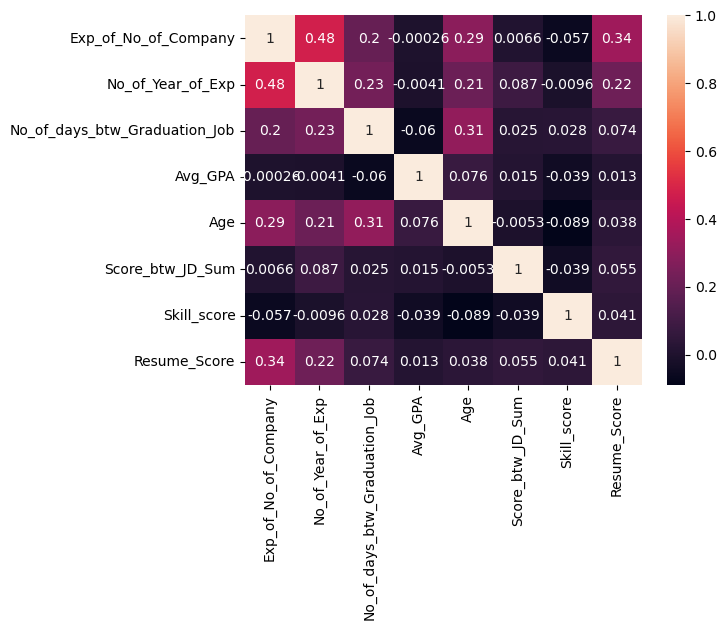

In [21]:
# Finding the correlation matrix
corr_matrix = dm.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


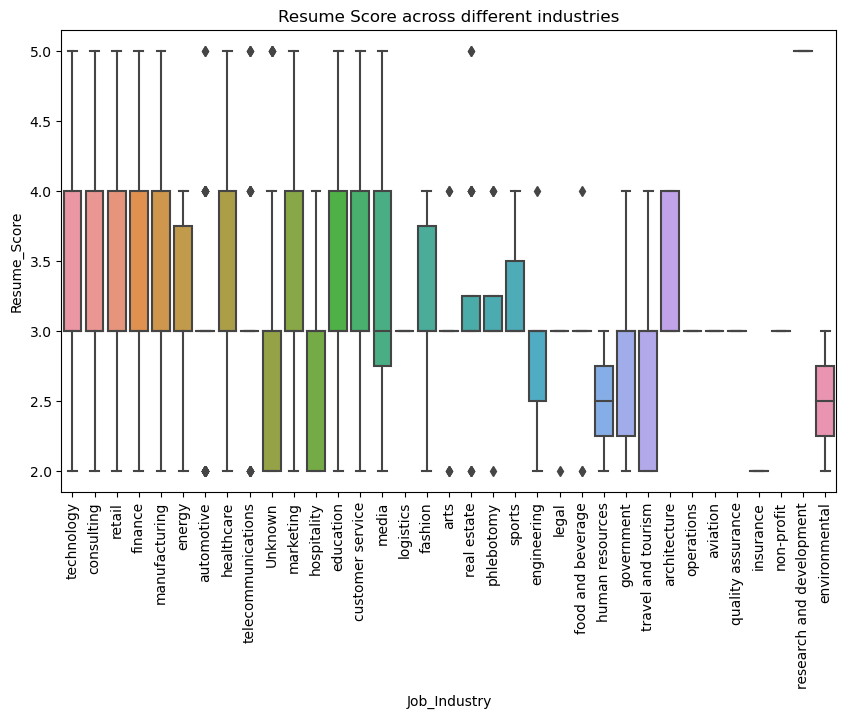

In [22]:
# Exploring Resume Score across different industries
plt.figure(figsize=(10,6))
sns.boxplot(data=dm, x='Job_Industry', y='Resume_Score')
plt.xticks(rotation=90)
plt.title('Resume Score across different industries')
plt.show()

In [23]:
# Finding the industry with the best resumes
best_industry = dm.groupby('Job_Industry')['Resume_Score'].mean().idxmax()
print(f'The industry with the best resumes is: {best_industry}')

The industry with the best resumes is: research and development


In [24]:
# Finding the industry with the worst resumes
worst_industry = dm.groupby('Job_Industry')['Resume_Score'].mean().idxmin()
print(f'The industry with the worst resumes is: {worst_industry}')

The industry with the worst resumes is: insurance


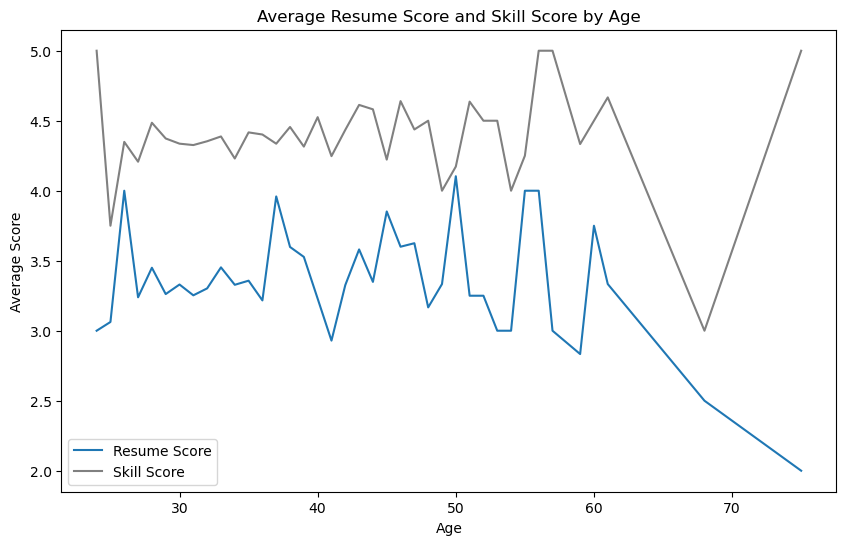

In [26]:
# Filter out rows where age is 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate average resume score and skill score by age
average_score_by_age = filtered_dm.groupby('Age')['Resume_Score'].mean()
average_skill_score_by_age = filtered_dm.groupby('Age')['Skill_score'].mean()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_age, label='Resume Score')
sns.lineplot(data=average_skill_score_by_age, color='grey', label='Skill Score')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Age')
plt.legend()
plt.show()

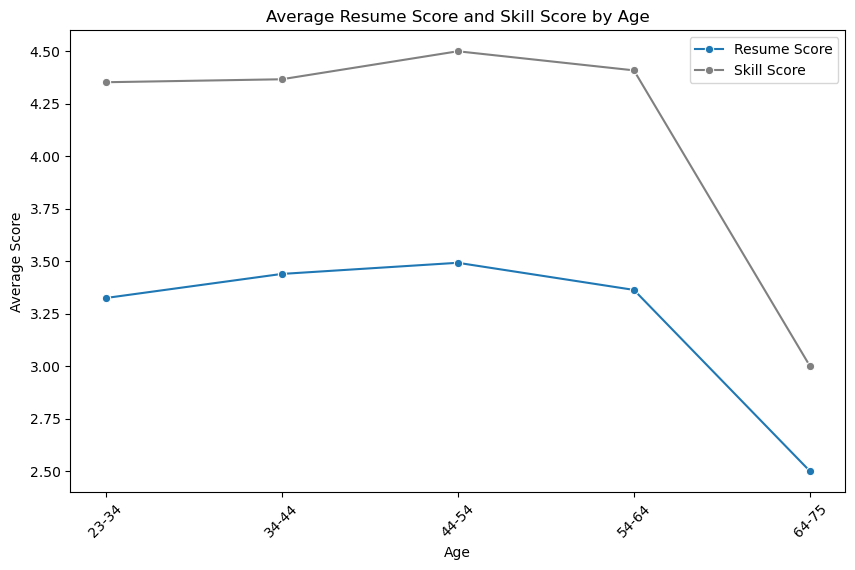

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out rows where age is 0
filtered_dm = dm[dm['Age'] != 0]

# Define the custom bin edges for age ranges
bin_edges = [23, 34, 44, 54, 64, 75]

# Bin the ages into specified ranges
age_bins = pd.cut(filtered_dm['Age'], bins=bin_edges, include_lowest=True, right=False,
                  labels=[f'{start}-{end}' for start, end in zip(bin_edges[:-1], bin_edges[1:])])

# Calculate average resume score and skill score by age group
average_score_by_age = filtered_dm.groupby(age_bins)['Resume_Score'].mean()
average_skill_score_by_age = filtered_dm.groupby(age_bins)['Skill_score'].mean()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_age, label='Resume Score', marker='o')
sns.lineplot(data=average_skill_score_by_age, color='grey', label='Skill Score', marker='o')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


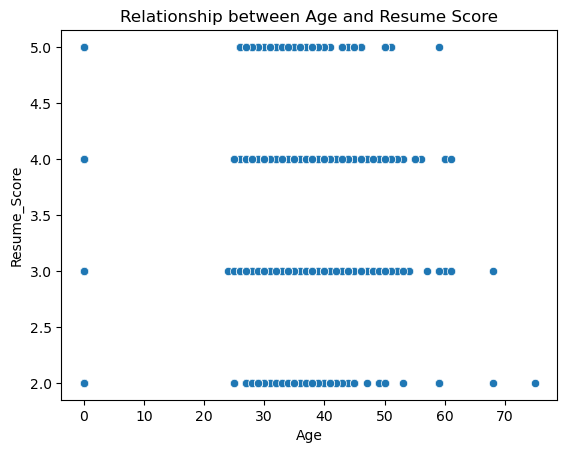

In [27]:
# Exploring demographic trends 
# Relationship between age and Resume Score
sns.scatterplot(data=dm, x='Age', y='Resume_Score')
plt.title('Relationship between Age and Resume Score')
plt.show()

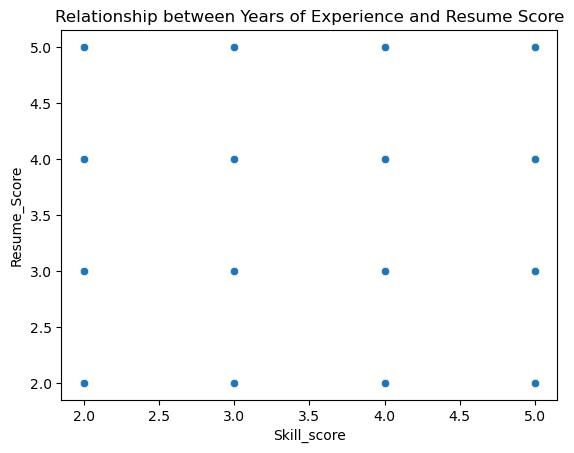

In [28]:
# Relationship between No_of_Year_of_Exp and Resume Score
sns.scatterplot(data=dm, x='Skill_score', y='Resume_Score')
plt.title('Relationship between Years of Experience and Resume Score')
plt.show()

# Industries Resume Scores

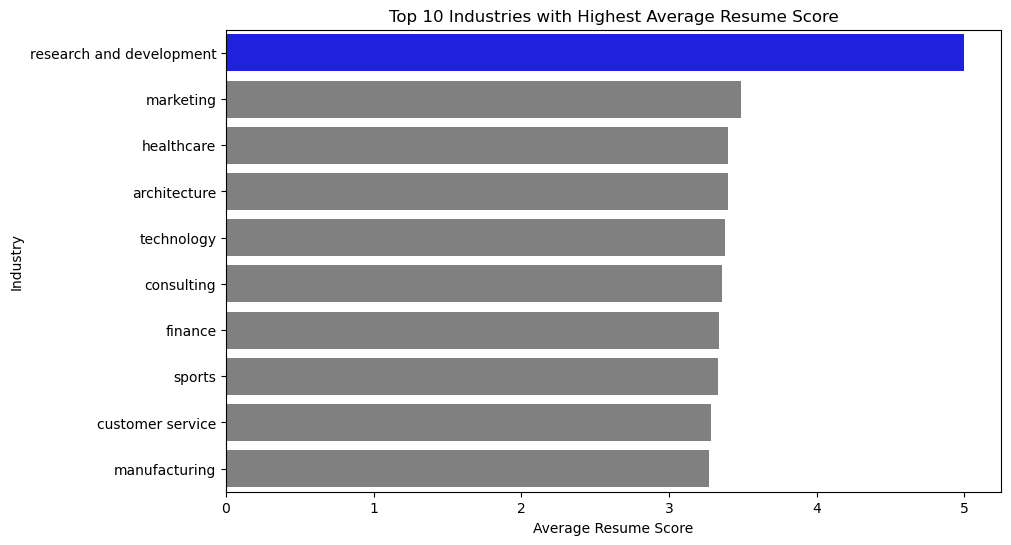

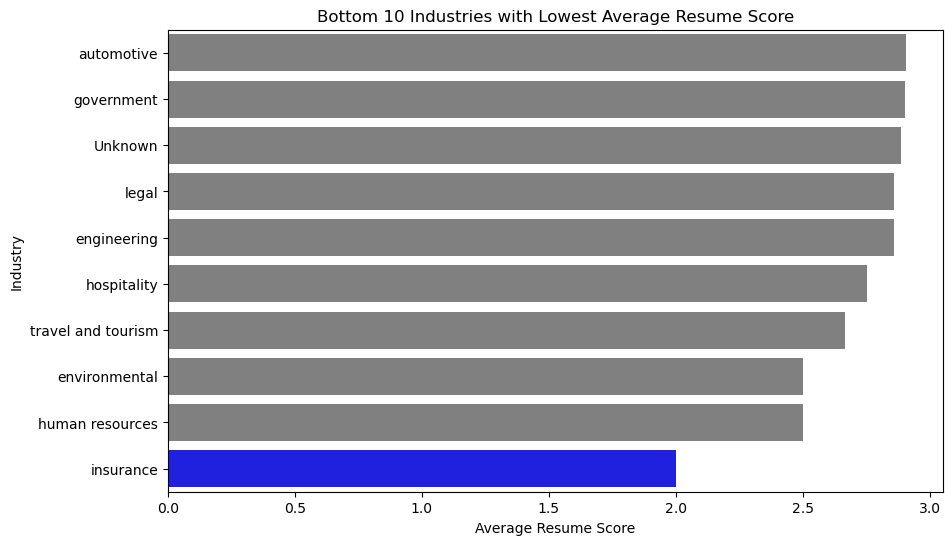

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean resume score for each industry
industry_score = dm.groupby('Job_Industry')['Resume_Score'].mean().sort_values(ascending=False)

# Get top 10 industries
top_10_industries = industry_score.head(10)

# Plot top 10 industries
plt.figure(figsize=(10, 6))
colors = ['blue' if x == max(top_10_industries) else 'grey' for x in top_10_industries]
sns.barplot(x=top_10_industries, y=top_10_industries.index, palette=colors)
plt.xlabel('Average Resume Score')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest Average Resume Score')
plt.show()

# Get bottom 10 industries
bottom_10_industries = industry_score.tail(10)

# Plot bottom 10 industries
plt.figure(figsize=(10, 6))
colors = ['blue' if x == min(bottom_10_industries) else 'grey' for x in bottom_10_industries]
sns.barplot(x=bottom_10_industries, y=bottom_10_industries.index, palette=colors)
plt.xlabel('Average Resume Score')
plt.ylabel('Industry')
plt.title('Bottom 10 Industries with Lowest Average Resume Score')
plt.show()


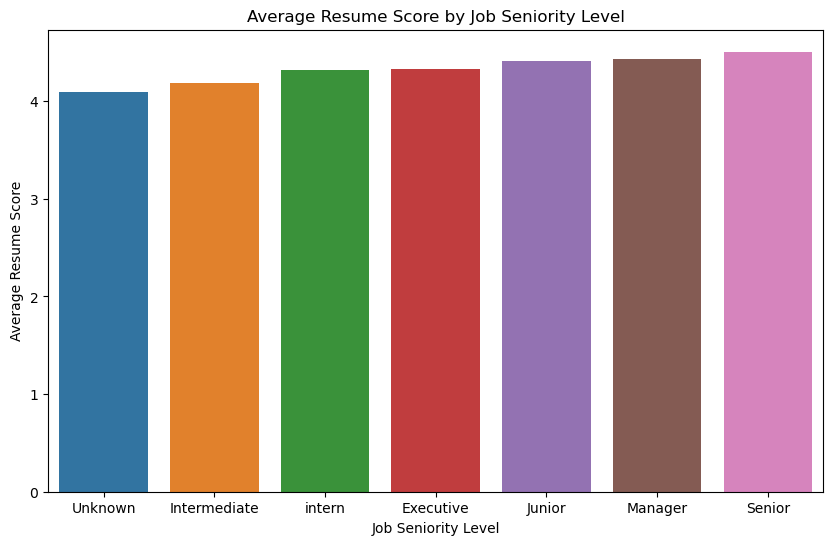

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score by job seniority level
average_score_by_seniority = dm.groupby('Job_Seniority_lvl')['Skill_score'].mean().sort_values()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=average_score_by_seniority.index, y=average_score_by_seniority)
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.title('Average Resume Score by Job Seniority Level')
plt.show()


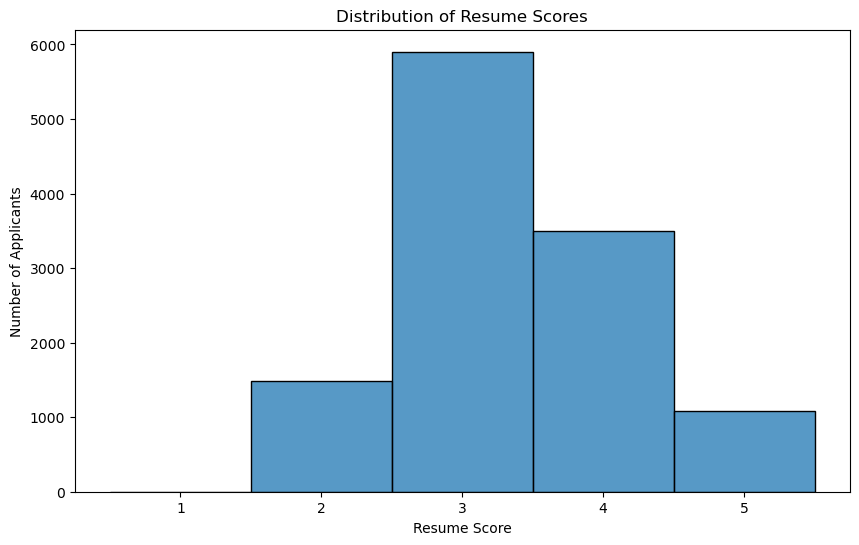

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=dm, x='Resume_Score', binwidth=1, binrange=(0.5, 5.5), kde=False)
plt.xticks(range(1, 6))  # Explicitly set x-ticks to [1,2,3,4,5]
plt.xlabel('Resume Score')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Resume Scores')
plt.show()



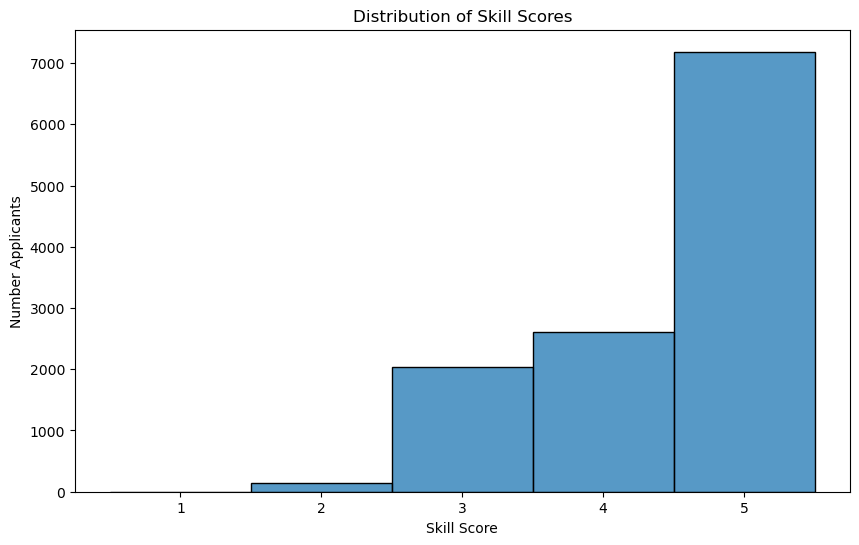

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=dm, x='Skill_score', binwidth=1, binrange=(0.5, 5.5), kde=False)
plt.xticks(range(1, 6))  # Explicitly set x-ticks to [1,2,3,4,5]
plt.xlabel('Skill Score')
plt.ylabel('Number Applicants')
plt.title('Distribution of Skill Scores')
plt.show()

In [33]:
average_score_by_country = filtered_dm.groupby('Graduation_Country')['Resume_Score'].mean().sort_values(ascending = False)
average_score_by_country.head(10)

Graduation_Country
대한민국                              5.000000
السعودية                          5.000000
Монгол улс ᠮᠤᠩᠭᠤᠯ ᠤᠯᠤᠰ            5.000000
Honduras                          4.500000
ประเทศไทย                         4.071429
臺灣                                4.000000
پاکستان                           4.000000
Тоҷикистон                        4.000000
The Bahamas                       4.000000
Schweiz/Suisse/Svizzera/Svizra    4.000000
Name: Resume_Score, dtype: float64

In [34]:
average_score_by_country = filtered_dm.groupby('Graduation_Country')['Skill_score'].mean().sort_values(ascending = False)
average_score_by_country.head(10)

Graduation_Country
Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر    5.0
Cuba                           5.0
日本                             5.0
پاکستان                        5.0
السعودية                       5.0
Монгол улс ᠮᠤᠩᠭᠤᠯ ᠤᠯᠤᠰ         5.0
Česko                          5.0
Venezuela                      5.0
Uruguay                        5.0
Türkiye                        5.0
Name: Skill_score, dtype: float64

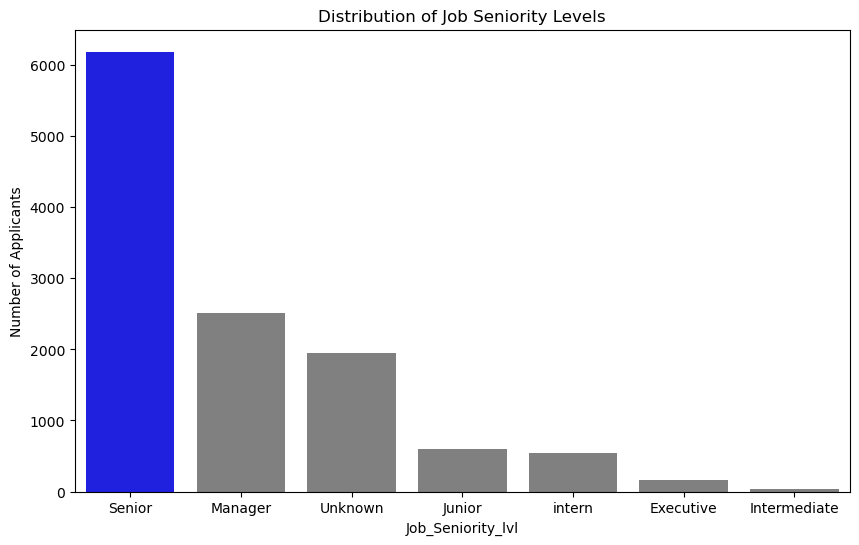

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Order data
order = dm['Job_Seniority_lvl'].value_counts().index

# Create bar plot
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=dm, x='Job_Seniority_lvl', order=order, palette=['blue' if cat == order[0] else 'grey' for cat in order])

plt.title('Distribution of Job Seniority Levels')
plt.ylabel('Number of Applicants')  # Add y-axis label
plt.show()



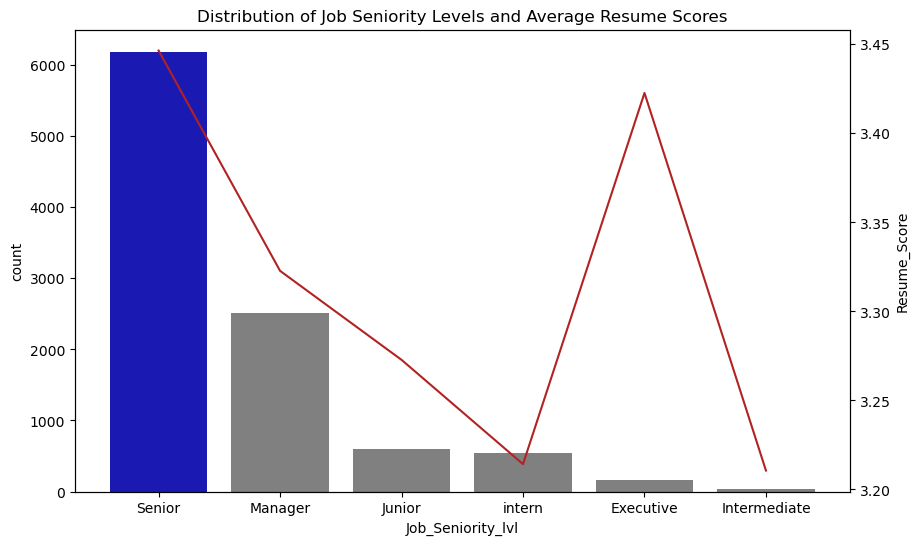

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Order data
order = filtered_dm['Job_Seniority_lvl'].value_counts().index

# Create bar plot
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=filtered_dm, x='Job_Seniority_lvl', order=order, palette=['mediumblue' if cat == order[0] else 'grey' for cat in order])

# Create a twin Axes sharing the xaxis
ax2 = plt.twinx()

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()[order]

# Create line plot
sns.lineplot(data=mean_scores, sort=False, ax=ax2, color = 'firebrick')

plt.title('Distribution of Job Seniority Levels and Average Resume Scores')
plt.show()


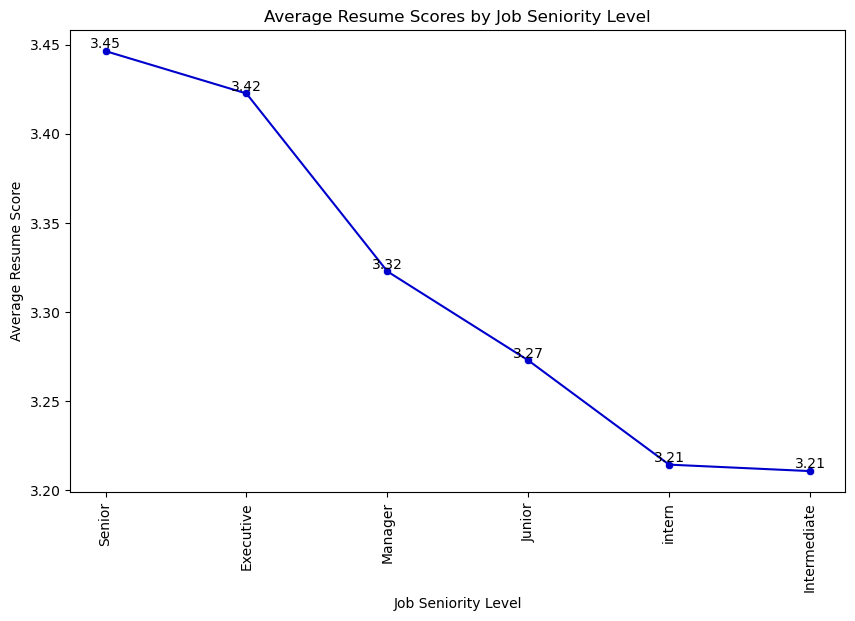

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()

# Sort by highest to lowest scores
mean_scores = mean_scores.sort_values(ascending=False)

# Create line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=mean_scores, sort=False, color='mediumblue')

# Add dots to mark the points
sns.scatterplot(data=mean_scores, color='mediumblue')

# Add values to the line plot
for x, y in enumerate(mean_scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.title('Average Resume Scores by Job Seniority Level')
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.xticks(rotation=90)
plt.show()

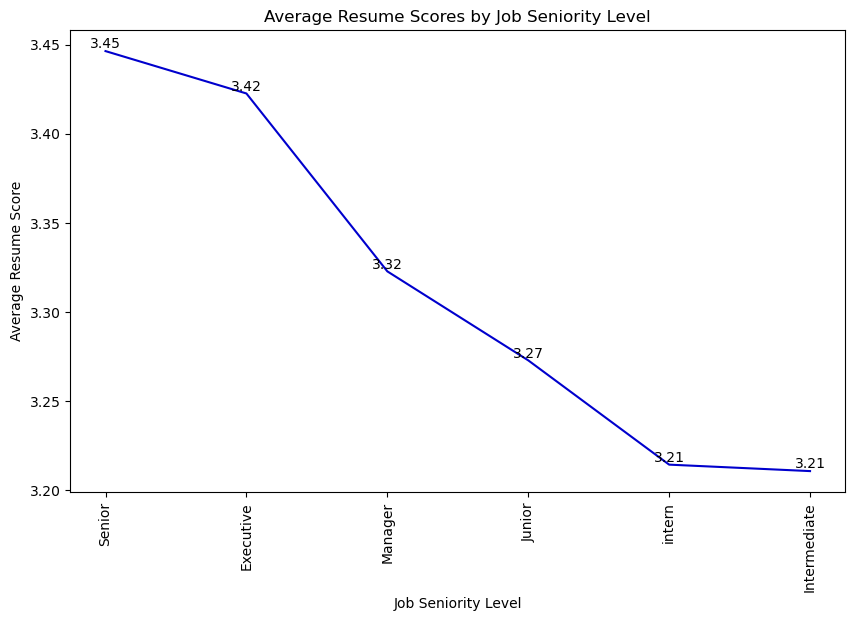

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()

# Sort by highest to lowest scores
mean_scores = mean_scores.sort_values(ascending=False)

# Create line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=mean_scores, sort=False, color='mediumblue')

# Add values to the line plot
for x, y in enumerate(mean_scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.title('Average Resume Scores by Job Seniority Level')
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.xticks(rotation=90)
plt.show()

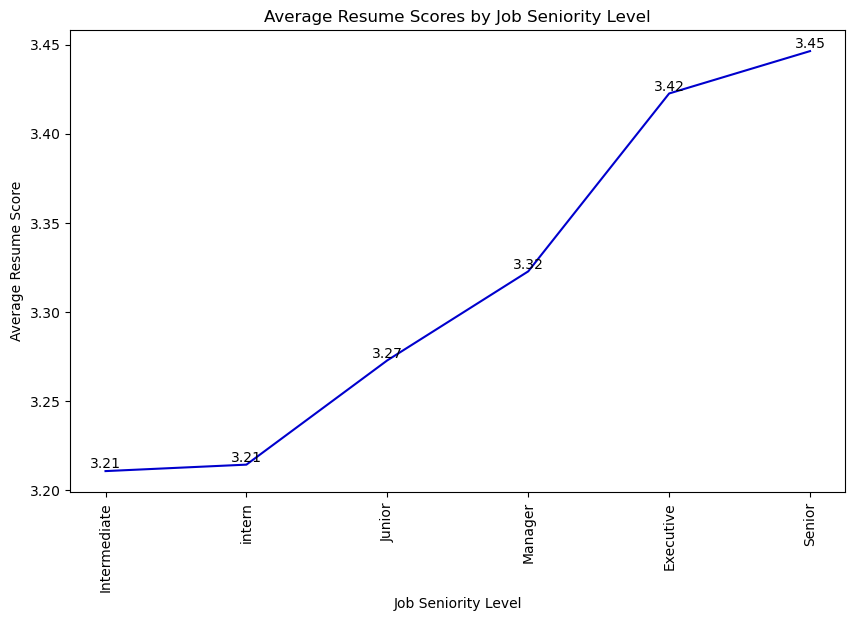

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()

# Sort by lowest to highest scores
mean_scores = mean_scores.sort_values(ascending=True)

# Create line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=mean_scores, sort=False, color='mediumblue')

# Add values to the line plot
for x, y in enumerate(mean_scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.title('Average Resume Scores by Job Seniority Level')
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.xticks(rotation=90)
plt.show()

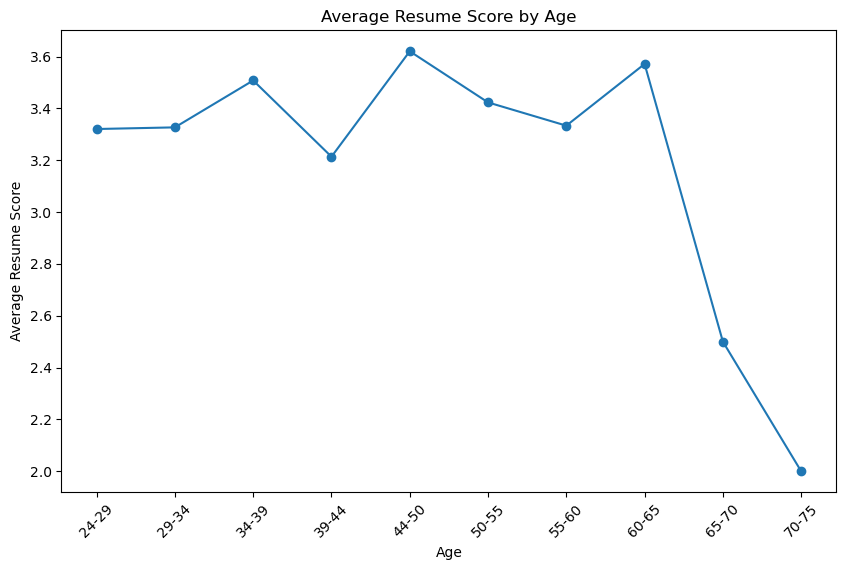

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude age 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate the average score per age bin
average_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=10, precision=0))['Resume_Score'].mean().dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(average_score)), average_score.values, marker='o', linestyle='-')

# Set x-axis labels
age_labels = [f"{int(b.left)}-{int(b.right)}" for b in average_score.index]
plt.xticks(ticks=range(len(average_score)), labels=age_labels, rotation=45)

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Average Resume Score')
plt.title('Average Resume Score by Age')

# Show the plot
plt.show()




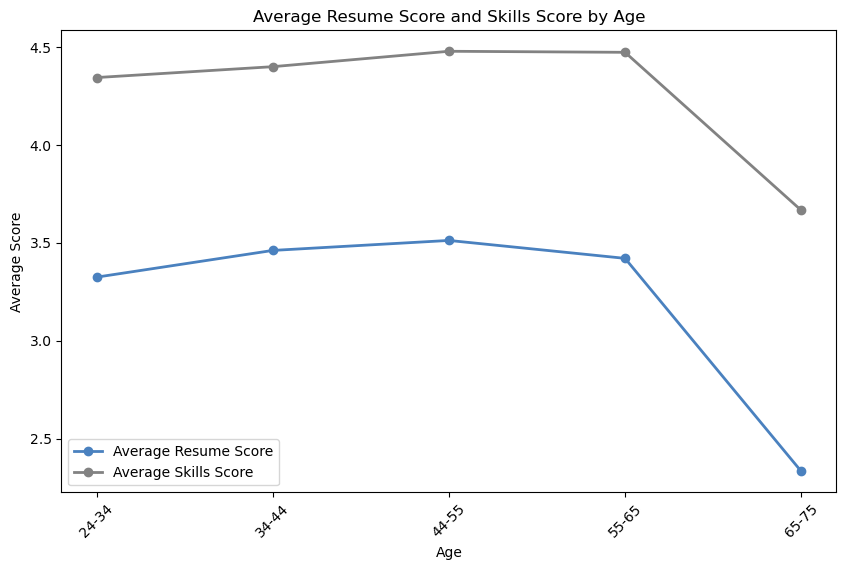

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude age 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate the average resume score per age bin
average_resume_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Resume_Score'].mean().dropna()

# Calculate the average skills score per age bin
average_skills_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Skill_score'].mean().dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(average_resume_score)), average_resume_score.values, marker='o', linestyle='-', linewidth=2, label='Average Resume Score', color='#4A81BF')
plt.plot(range(len(average_skills_score)), average_skills_score.values, marker='o', linestyle='-', linewidth=2, label='Average Skills Score', color='#828282')

# Set x-axis labels
age_labels = [f"{int(b.left)}-{int(b.right)}" for b in average_resume_score.index]
plt.xticks(ticks=range(len(average_resume_score)), labels=age_labels, rotation=45)

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skills Score by Age')

# Add a legend
plt.legend()

# Show the plot
plt.show()



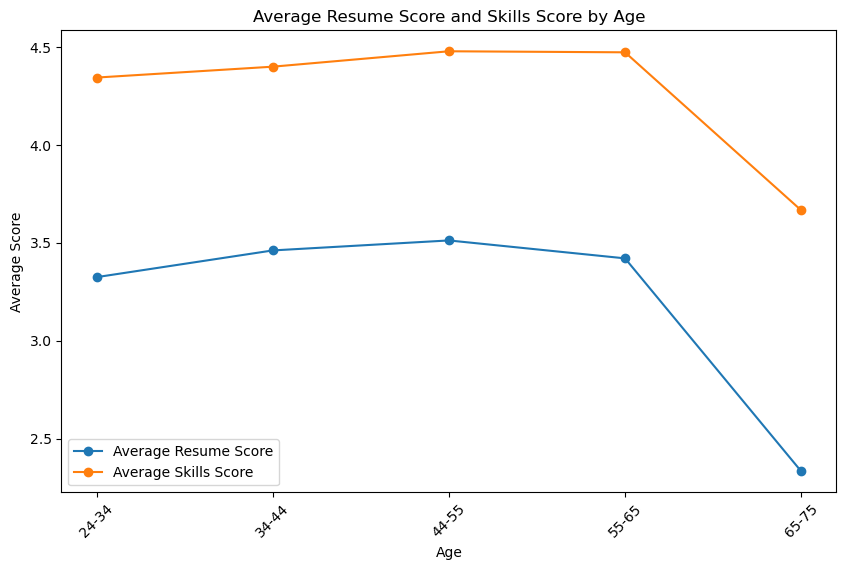

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Exclude age 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate the average resume score per age bin
average_resume_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Resume_Score'].mean().dropna()

# Calculate the average skills score per age bin
average_skills_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Skill_score'].mean().dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(average_resume_score)), average_resume_score.values, marker='o', linestyle='-', label='Average Resume Score')
plt.plot(range(len(average_skills_score)), average_skills_score.values, marker='o', linestyle='-', label='Average Skills Score')

# Set x-axis labels
age_labels = [f"{int(b.left)}-{int(b.right)}" for b in average_resume_score.index]
plt.xticks(ticks=range(len(average_resume_score)), labels=age_labels, rotation=45)

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skills Score by Age')

# Add a legend
plt.legend()

# Show the plot
plt.show()


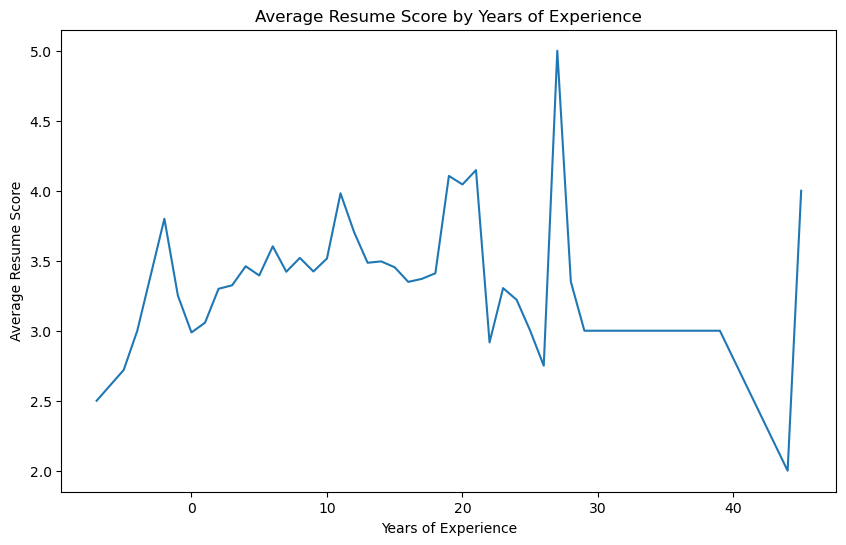

In [47]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score by years of experience
average_score_by_exp = dm.groupby('No_of_Year_of_Exp')['Resume_Score'].mean()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_exp)
plt.xlabel('Years of Experience')
plt.ylabel('Average Resume Score')
plt.title('Average Resume Score by Years of Experience')
plt.show()


C:\Users\james\AppData\Local\Temp\ipykernel_18860\1137514048.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['Experience_Group'] = pd.cut(dm['No_of_Year_of_Exp'], bins=bin_edges, labels=[f'{start}-{start+9}' for start in bin_edges[:-1]])


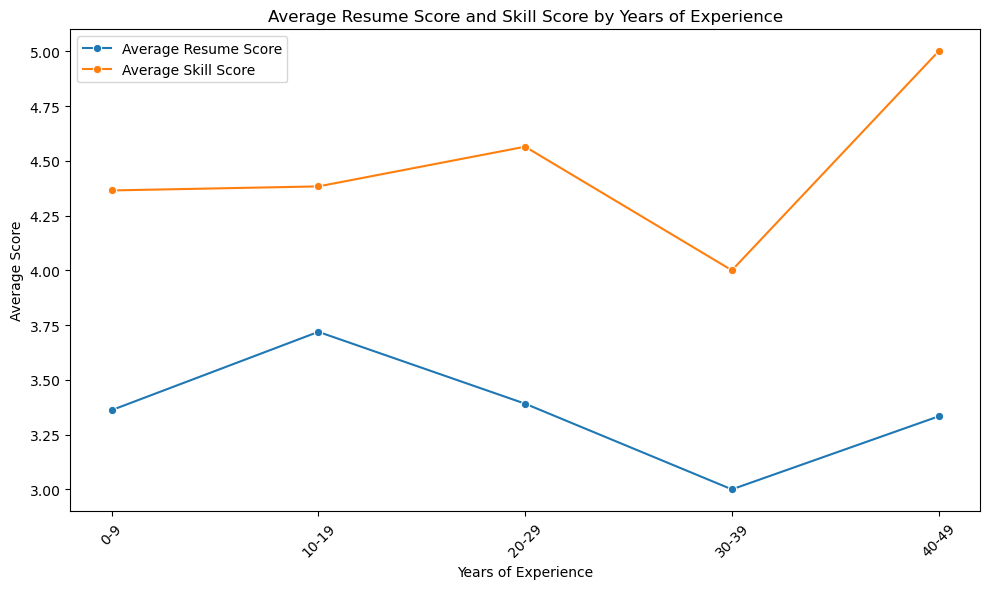

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the bin edges for grouping years of experience
bin_edges = np.arange(0, dm['No_of_Year_of_Exp'].max()+11, 10)

# Bin the years of experience into groups
dm['Experience_Group'] = pd.cut(dm['No_of_Year_of_Exp'], bins=bin_edges, labels=[f'{start}-{start+9}' for start in bin_edges[:-1]])

# Calculate average resume score and average skill score by experience group
average_resume_by_exp = dm.groupby('Experience_Group')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('Experience_Group')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score', marker='o')  # Add marker for each data point
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score', marker='o')  # Add marker for each data point

plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()  # Adjust spacing of the plot elements
plt.show()




C:\Users\james\AppData\Local\Temp\ipykernel_18860\300786261.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dm['Experience_Group'] = pd.cut(dm['No_of_Year_of_Exp'], bins=bin_edges, labels=[f'{start}-{start+9}' for start in bin_edges[:-1]])


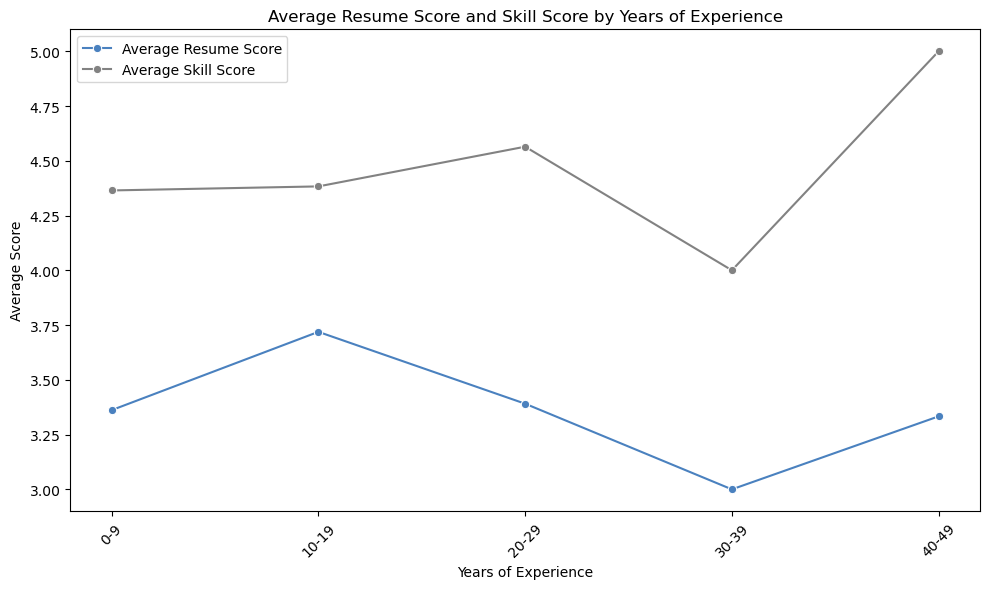

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the bin edges for grouping years of experience
bin_edges = np.arange(0, dm['No_of_Year_of_Exp'].max()+11, 10)

# Bin the years of experience into groups
dm['Experience_Group'] = pd.cut(dm['No_of_Year_of_Exp'], bins=bin_edges, labels=[f'{start}-{start+9}' for start in bin_edges[:-1]])

# Calculate average resume score and average skill score by experience group
average_resume_by_exp = dm.groupby('Experience_Group')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('Experience_Group')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score', marker='o', color='#4A81BF')  # Change color to grey
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score', marker='o', color='#828282')  # Change color to blue

plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()  # Adjust spacing of the plot elements
plt.show()


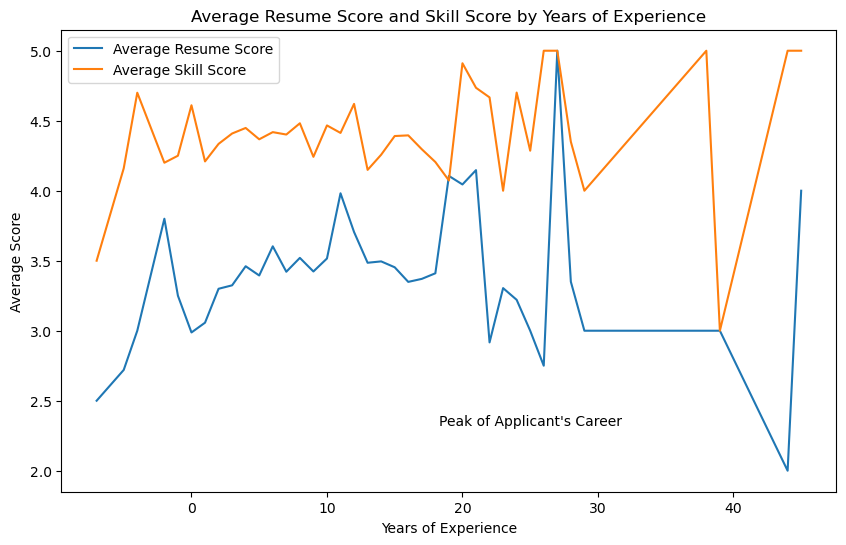

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score and average skill score by years of experience
average_resume_by_exp = dm.groupby('No_of_Year_of_Exp')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('No_of_Year_of_Exp')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score')
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score')

# Add comment on the plot
plt.text(25, 2.3, "Peak of Applicant's Career", ha='center', va='bottom')

plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.legend()
plt.show()



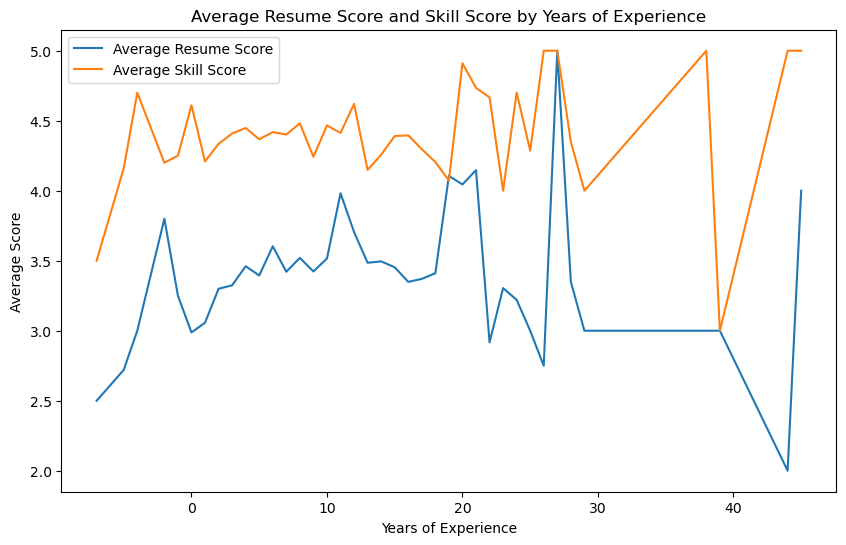

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score and average skill score by years of experience
average_resume_by_exp = dm.groupby('No_of_Year_of_Exp')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('No_of_Year_of_Exp')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score')
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score')
plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.legend()
plt.show()


In [134]:
average_skill_score_by_industry = dm.groupby('Job_Industry')['Skill_score'].mean().sort_values(ascending=False)
top_industries_skill = average_skill_score_by_industry.head(10)
print("Top Ten Industries by Average Skill Score:")
print(top_industries_skill)
print()

Top Ten Industries by Average Skill Score:
Job_Industry
research and development    5.000000
non-profit                  5.000000
aviation                    5.000000
quality assurance           5.000000
technology                  4.486065
healthcare                  4.459259
finance                     4.348910
phlebotomy                  4.333333
education                   4.303907
manufacturing               4.235741
Name: Skill_score, dtype: float64



In [135]:
# Calculate average skills score by job industry
average_skills_by_industry = dm.groupby('Job_Industry')['Skill_score'].mean()

# Filter industries with an average skills score of 5
filtered_industries = average_skills_by_industry[average_skills_by_industry == 5].index

# Filter data for the selected industries and select relevant columns
filtered_data = dm[dm['Job_Industry'].isin(filtered_industries)][['Job_Industry', 'Skill_score', 'Resume_Score']]

# Display the table
print(filtered_data)

                  Job_Industry  Skill_score  Resume_Score
2852                  aviation            5             3
3592         quality assurance            5             3
7821                non-profit            5             3
8967  research and development            5             5


In [136]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import DBSCAN
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')
# Load the original dataframe
ds = pd.read_csv('Skills.csv')

# Assuming ds is your dataframe and 'skills' is the column with the skills text

# Fill NaN with empty string
ds['skills'].fillna('', inplace=True)

# Lowercase, remove punctuation, and tokenize skills
ds['processed_skills'] = ds['skills'].str.lower().str.replace('[^\w\s]', '').apply(word_tokenize)

# Train Word2Vec model
model = Word2Vec(ds['processed_skills'], min_count=1)

# Function to vectorize a skill
def vectorize(skill):
    vector_list = [model.wv[word] for word in skill if word in model.wv]
    if vector_list:
        return np.mean(vector_list, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a vector of zeros if skill is empty or contains only stopwords

# Vectorize skills
ds['vectors'] = ds['processed_skills'].apply(vectorize)

# Fit DBSCAN model
dbscan = DBSCAN(min_samples=2, metric='cosine')  # You might need to adjust parameters depending on your data
ds['cluster'] = dbscan.fit_predict(np.vstack(ds['vectors'].values))

print(ds[['skills', 'cluster']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\james\AppData\Local\Temp\ipykernel_2508\135848063.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['processed_skills'] = ds['skills'].str.lower().str.replace('[^\w\s]', '').apply(word_tokenize)


                            skills  cluster
0                           Jobber        0
1                  Microsoft Excel        1
2                           Verbal        1
3      User research methodologies        1
4                     Gamification        2
...                            ...      ...
28342                   Monday.com        1
28343                    WordPress        1
28344                         HTML        1
28345                     Facebook        1
28346                Facebook Live        1

[28347 rows x 2 columns]


In [137]:
# Determine the most frequent skill in each cluster
cluster_labels = ds.groupby('cluster')['skills'].agg(lambda x: x.value_counts().idxmax())

# Map clusters to labels
ds['labels'] = ds['cluster'].map(cluster_labels)

In [138]:
dm = dm.merge(ds[['id', 'skills']], on='id', how='left')

In [139]:
dm = dm.rename(columns={'labels': 'Skills'})

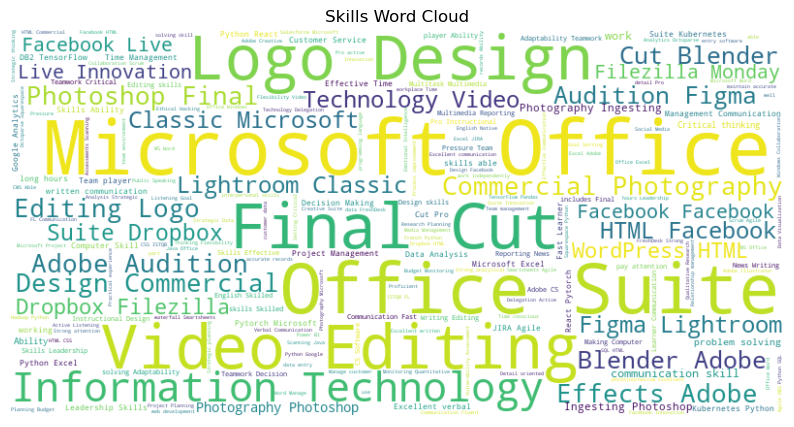

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Preprocess the skills text
skills = dm['skills'].dropna().tolist()
skills_text = ' '.join(skills)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud')
plt.show()



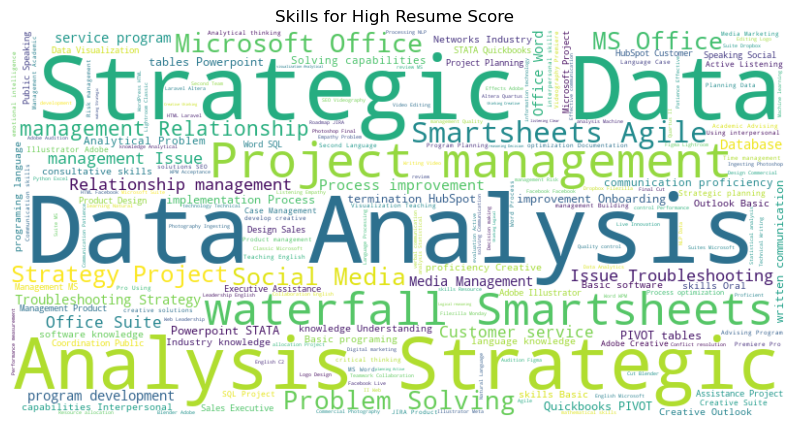

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the dataframe based on Resume_Score equal to 5
filtered_dm = dm[dm['Resume_Score'] == 5]

# Preprocess the skills text
skills = filtered_dm['skills'].dropna().tolist()
skills_text = ' '.join(skills)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills for High Resume Score ')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the dataframe based on Resume_Score equal to 5
filtered_dm = dm[dm['Resume_Score'] == 5]

# Preprocess the skills text
skills = filtered_dm['skills'].dropna().tolist()
skills_text = ' '.join(skills)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud (Resume Score = 5)')
plt.show()

In [69]:
dm.head

<bound method NDFrame.head of                                id Last_Day_of_School  Exp_of_No_of_Company  \
0       clg43d9an007gx02ug1i694j6         2019-06-01                     2   
1       clg43d9an007gx02ug1i694j6         2019-06-01                     2   
2       clg43d9an007gx02ug1i694j6         2019-06-01                     2   
3       clg43d9an007gx02ug1i694j6         2019-06-01                     2   
4       clg43d9an007gx02ug1i694j6         2019-06-01                     2   
...                           ...                ...                   ...   
206104  cleecwhm6006dyf2tsr12f761         2022-10-01                     4   
206105  cleecwhm6006dyf2tsr12f761         2022-10-01                     4   
206106  cleecwhm6006dyf2tsr12f761         2022-10-01                     4   
206107  cleecwhm6006dyf2tsr12f761         2022-10-01                     4   
206108  cleecwhm6006dyf2tsr12f761         2022-10-01                     4   

        No_of_Year_of_Exp  No_of_

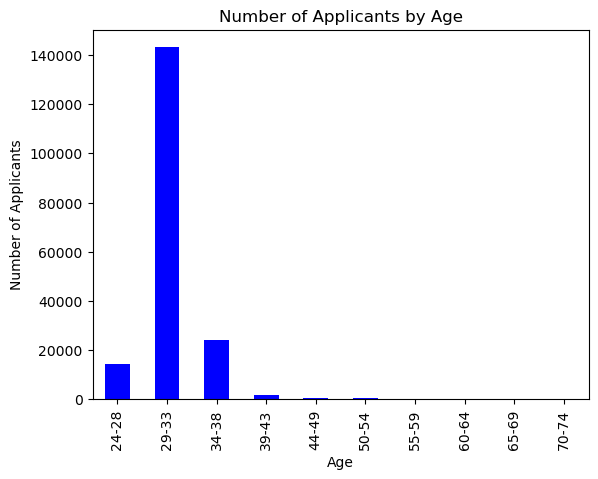

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

dn = dm.loc[dm['Age'] != 0]

# Assuming you have a DataFrame named 'dn'
age_bins = pd.cut(dn['Age'], bins=10, precision=0, right=False)  # Divide ages into 10 integer bins
age_counts = age_bins.value_counts().sort_index()  # Count frequencies for each bin

# Create the bar plot
age_counts.plot(kind='bar', color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Age')

# Format x-axis labels as desired
labels = [f'{int(b.left)}-{int(b.right)-1}' for b in age_counts.index]
plt.xticks(range(len(age_counts.index)), labels)

plt.show()

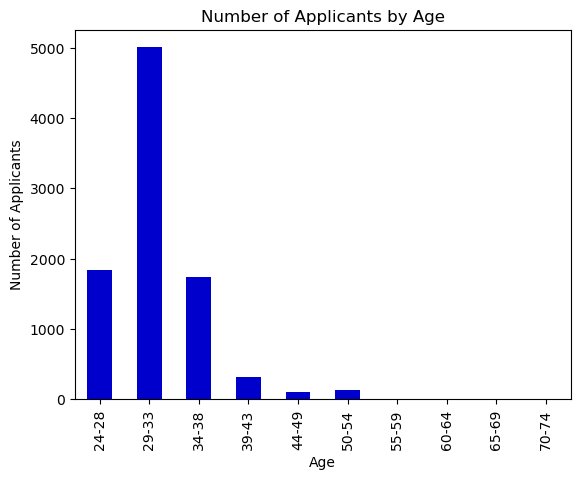

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

dn = dm.loc[dm['Age'] != 0]

# Assuming you have a DataFrame named 'dn'
age_bins = pd.cut(dn['Age'], bins=10, precision=0, right=False)  # Divide ages into 10 integer bins
age_counts = age_bins.value_counts().sort_index()  # Count frequencies for each bin

# Create the bar plot with the specified color
age_counts.plot(kind='bar', color='mediumblue')

plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Age')

# Format x-axis labels as desired
labels = [f'{int(b.left)}-{int(b.right)-1}' for b in age_counts.index]
plt.xticks(range(len(age_counts.index)), labels)

plt.show()


In [ ]:
import pandas as pd
import json
import os
os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')

resume_with_job_description = pd.read_csv('resume_with_job_description.csv')
resume_no_job_description = pd.read_csv('resume_no_job_description.csv')

import pandas as pd
import json
import os

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')

# Load the original dataframe
df = pd.read_csv('resume_with_job_description.csv')
df.head()

# Define a function to extract skills from content
def extract_skills(content):
    try:
        data = json.loads(content)
        skills = data['skills']['skills']
        skills_list = [skill['section'] for skill in skills]
        return skills_list
    except:
        return []

# Apply the function to the content column to create a new column named 'skills'
df['skills'] = df['content'].apply(extract_skills)

# Define a function to clean skills data
def clean_skills(skills_list):
    cleaned_list = []
    for skill in skills_list:
        skill = skill.split(',')[0]  # Remove section name
        skill = skill.replace('visible: true, ', '')  # Remove 'visible: true'
        skill = skill.strip()  # Remove leading/trailing spaces
        cleaned_list.append(skill)
    return cleaned_list

# Apply the function to the 'skills' column to clean the skills data
df['skills_cleaned'] = df['skills'].apply(clean_skills)

# Create a dataframe for skills
skills_df = pd.DataFrame({'id': df['id'], 'skills': df['skills_cleaned']})

# Print the skills dataframe
print(skills_df)


import pandas as pd
import json
import os

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')

# Load the original dataframe
df = pd.read_csv('resume_with_job_description.csv')
df.head()

# Define a function to extract skills from content
def extract_skills(content):
    try:
        data = json.loads(content)
        skills = data['skills']['skills']
        skills_list = [skill['section'] for skill in skills]
        return skills_list
    except:
        return []

# Apply the function to the content column to create a new column named 'skills'
df['skills'] = df['content'].apply(extract_skills)

# Define a function to clean skills data
def clean_skills(skills_list):
    cleaned_list = []
    for skill in skills_list:
        skill = skill.split(',')[0]  # Remove section name
        skill = skill.replace('visible: true, ', '')  # Remove 'visible: true'
        skill = skill.strip()  # Remove leading/trailing spaces
        cleaned_list.append(skill)
    return cleaned_list

# Apply the function to the 'skills' column to clean the skills data
df['skills_cleaned'] = df['skills'].apply(clean_skills)

# Create a new dataframe with separate rows for each skill
new_rows = []
for index, row in df.iterrows():
    skills = row['skills_cleaned']
    for skill in skills:
        new_row = {'id': row['id'], 'skills': skill}
        new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

# Print the new dataframe
print(new_df.head())


new_df.to_csv('Skills.csv', index=False)

dataset = df

import pandas as pd
import json
from multiprocessing import Pool

# Read the 'resume_with_job_description' CSV file
resume_with_job_description_df = pd.read_csv('resume_with_job_description.csv')

# Check for important sections
important_sections = ['work experience', 'education', 'projects', 'reference']
resume_with_job_description_df['Important Sections'] = resume_with_job_description_df['content'].apply(lambda x: int(any(section in x.lower() for section in important_sections)))

# Function to count words in the CV text
def count_words(cv_text):
    # Parse the JSON-formatted CV content
    cv_data = json.loads(cv_text)
    
    # Extract the CV text from 'summary' and 'experience' fields
    cv_summary = cv_data.get('summary', {}).get('text', '')
    
    cv_experience = ""
    experience_list = cv_data.get('experience', {}).get('experience', [])
    for experience in experience_list:
        cv_experience += " " + experience.get('description', '')
    
    # Combine the CV text
    cv_text_combined = cv_summary + ' ' + cv_experience
    
    # Split the CV text into words and exclude non-CV words
    words = [word for word in cv_text_combined.split() if not word.startswith(('http', 'www', '{'))]
    
    return len(words)

# Check resume length
resume_with_job_description_df['Resume length'] = resume_with_job_description_df['content'].apply(count_words).apply(lambda x: int(300 <= x <= 500))

# Check use of action verbs
action_verbs = ['achieved', 'completed', 'increased', 'proposed']  # Add more action verbs as needed
resume_with_job_description_df['Action Verbs'] = resume_with_job_description_df['content'].apply(lambda x: int(any(verb in x.lower() for verb in action_verbs)))

# Check for pronouns
pronouns = ['i', 'we', 'me', 'our', 'ours', 'mine']  # Add more pronouns as needed
resume_with_job_description_df['Pronouns'] = resume_with_job_description_df['content'].apply(lambda x: int(not any(pronoun in x.lower().split() for pronoun in pronouns)))

# Check excessive bullet points
resume_with_job_description_df['Bullet Points'] = resume_with_job_description_df['content'].apply(lambda x: int(x.count('•') <= 10))

# Save the modified DataFrame to a new CSV file
resume_with_job_description_df.to_csv('resume_with_job_description_modified.csv', index=False)


# Read the 'resume_no_job_description' CSV file
resume_no_job_description_df = pd.read_csv('resume_no_job_description.csv')

# Apply the same checks and add columns for the criteria
resume_no_job_description_df['Important Sections'] = resume_no_job_description_df['content'].apply(lambda x: int(any(section in x.lower() for section in important_sections)))
resume_no_job_description_df['Resume length'] = resume_no_job_description_df['content'].apply(lambda x: int(300 <= len(x.split()) <= 500))
resume_no_job_description_df['Action Verbs'] = resume_no_job_description_df['content'].apply(lambda x: int(any(verb in x.lower() for verb in action_verbs)))
resume_no_job_description_df['Pronouns'] = resume_no_job_description_df['content'].apply(lambda x: int(any(pronoun in x.lower().split() for pronoun in pronouns)))
resume_no_job_description_df['Bullet Points'] = resume_no_job_description_df['content'].apply(lambda x: int(x.count('-') <= 10))

# Save the modified DataFrame to a new CSV file
resume_no_job_description_df.to_csv('resume_no_job_description_modified.csv', index=False)


# Resume Scores

import pandas as pd
import os
os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Final Project')
# Load the original dataframe
df1 = pd.read_csv('resume_with_job_description_modified.csv')

df1 = df1.drop('content', axis=1)
df1 = df1.drop('jobDescription', axis=1)
df1['Resume Score'] = df1.sum(axis=1)

df2 = df1[['id','Resume Score']]
df2.head

df3 = pd.read_csv('DFF.csv')
df3.columns

df3 = df3.merge(df2[['id', 'Resume Score']], on='id', how='left')
df3.head()

# Save dataframe with Resumes Scores
df3.to_csv('DIFF_new.csv',index=False)

import pandas as pd
import os

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Final Project')
dx = pd.read_csv('DFF_updated.csv')

dx.head

dx.columns

dm = dx[['id', 'Last_Day_of_School', 'Exp_of_No_of_Company', 'No_of_Year_of_Exp',
       'No_of_days_btw_Graduation_Job', 'Avg_GPA', 'Age', 'Job_Industry',
       'Graduation_Country', 'Last_Day_Of_Work', 'First_Day_Work', 'Score_btw_JD_Sum', 'Skill_score',
       'Resume_Score', 'Job_Seniority_lvl']]

dm.head

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the data 
dm.describe(include='all')



# Finding the correlation matrix
corr_matrix = dm.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Exploring Resume Score across different industries
plt.figure(figsize=(10,6))
sns.boxplot(data=dm, x='Job_Industry', y='Resume_Score')
plt.xticks(rotation=90)
plt.title('Resume Score across different industries')
plt.show()

# Finding the industry with the best resumes
best_industry = dm.groupby('Job_Industry')['Resume_Score'].mean().idxmax()
print(f'The industry with the best resumes is: {best_industry}')

# Finding the industry with the worst resumes
worst_industry = dm.groupby('Job_Industry')['Resume_Score'].mean().idxmin()
print(f'The industry with the worst resumes is: {worst_industry}')

# Filter out rows where age is 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate average resume score and skill score by age
average_score_by_age = filtered_dm.groupby('Age')['Resume_Score'].mean()
average_skill_score_by_age = filtered_dm.groupby('Age')['Skill_score'].mean()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_age, label='Resume Score')
sns.lineplot(data=average_skill_score_by_age, color='grey', label='Skill Score')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Age')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out rows where age is 0
filtered_dm = dm[dm['Age'] != 0]

# Define the custom bin edges for age ranges
bin_edges = [23, 34, 44, 54, 64, 75]

# Bin the ages into specified ranges
age_bins = pd.cut(filtered_dm['Age'], bins=bin_edges, include_lowest=True, right=False,
                  labels=[f'{start}-{end}' for start, end in zip(bin_edges[:-1], bin_edges[1:])])

# Calculate average resume score and skill score by age group
average_score_by_age = filtered_dm.groupby(age_bins)['Resume_Score'].mean()
average_skill_score_by_age = filtered_dm.groupby(age_bins)['Skill_score'].mean()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_age, label='Resume Score', marker='o')
sns.lineplot(data=average_skill_score_by_age, color='grey', label='Skill Score', marker='o')
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.show()


# Exploring demographic trends 
# Relationship between age and Resume Score
sns.scatterplot(data=dm, x='Age', y='Resume_Score')
plt.title('Relationship between Age and Resume Score')
plt.show()

# Relationship between No_of_Year_of_Exp and Resume Score
sns.scatterplot(data=dm, x='Skill_score', y='Resume_Score')
plt.title('Relationship between Years of Experience and Resume Score')
plt.show()

# Industries Resume Scores

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean resume score for each industry
industry_score = dm.groupby('Job_Industry')['Resume_Score'].mean().sort_values(ascending=False)

# Get top 10 industries
top_10_industries = industry_score.head(10)

# Plot top 10 industries
plt.figure(figsize=(10, 6))
colors = ['blue' if x == max(top_10_industries) else 'grey' for x in top_10_industries]
sns.barplot(x=top_10_industries, y=top_10_industries.index, palette=colors)
plt.xlabel('Average Resume Score')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Highest Average Resume Score')
plt.show()

# Get bottom 10 industries
bottom_10_industries = industry_score.tail(10)

# Plot bottom 10 industries
plt.figure(figsize=(10, 6))
colors = ['blue' if x == min(bottom_10_industries) else 'grey' for x in bottom_10_industries]
sns.barplot(x=bottom_10_industries, y=bottom_10_industries.index, palette=colors)
plt.xlabel('Average Resume Score')
plt.ylabel('Industry')
plt.title('Bottom 10 Industries with Lowest Average Resume Score')
plt.show()


# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score by job seniority level
average_score_by_seniority = dm.groupby('Job_Seniority_lvl')['Skill_score'].mean().sort_values()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=average_score_by_seniority.index, y=average_score_by_seniority)
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.title('Average Resume Score by Job Seniority Level')
plt.show()


# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=dm, x='Resume_Score', binwidth=1, binrange=(0.5, 5.5), kde=False)
plt.xticks(range(1, 6))  # Explicitly set x-ticks to [1,2,3,4,5]
plt.xlabel('Resume Score')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Resume Scores')
plt.show()



# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=dm, x='Skill_score', binwidth=1, binrange=(0.5, 5.5), kde=False)
plt.xticks(range(1, 6))  # Explicitly set x-ticks to [1,2,3,4,5]
plt.xlabel('Skill Score')
plt.ylabel('Number Applicants')
plt.title('Distribution of Skill Scores')
plt.show()

average_score_by_country = filtered_dm.groupby('Graduation_Country')['Resume_Score'].mean().sort_values(ascending = False)
average_score_by_country.head(10)

average_score_by_country = filtered_dm.groupby('Graduation_Country')['Skill_score'].mean().sort_values(ascending = False)
average_score_by_country.head(10)

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Order data
order = dm['Job_Seniority_lvl'].value_counts().index

# Create bar plot
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=dm, x='Job_Seniority_lvl', order=order, palette=['blue' if cat == order[0] else 'grey' for cat in order])

plt.title('Distribution of Job Seniority Levels')
plt.ylabel('Number of Applicants')  # Add y-axis label
plt.show()



import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Order data
order = filtered_dm['Job_Seniority_lvl'].value_counts().index

# Create bar plot
plt.figure(figsize=(10, 6))
barplot = sns.countplot(data=filtered_dm, x='Job_Seniority_lvl', order=order, palette=['mediumblue' if cat == order[0] else 'grey' for cat in order])

# Create a twin Axes sharing the xaxis
ax2 = plt.twinx()

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()[order]

# Create line plot
sns.lineplot(data=mean_scores, sort=False, ax=ax2, color = 'firebrick')

plt.title('Distribution of Job Seniority Levels and Average Resume Scores')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()

# Sort by highest to lowest scores
mean_scores = mean_scores.sort_values(ascending=False)

# Create line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=mean_scores, sort=False, color='mediumblue')

# Add dots to mark the points
sns.scatterplot(data=mean_scores, color='mediumblue')

# Add values to the line plot
for x, y in enumerate(mean_scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.title('Average Resume Scores by Job Seniority Level')
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.xticks(rotation=90)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()

# Sort by highest to lowest scores
mean_scores = mean_scores.sort_values(ascending=False)

# Create line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=mean_scores, sort=False, color='mediumblue')

# Add values to the line plot
for x, y in enumerate(mean_scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.title('Average Resume Scores by Job Seniority Level')
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.xticks(rotation=90)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'Unknown'
filtered_dm = dm[dm['Job_Seniority_lvl'] != 'Unknown']

# Calculate mean resume scores per Job_Seniority_lvl
mean_scores = filtered_dm.groupby('Job_Seniority_lvl')['Resume_Score'].mean()

# Sort by lowest to highest scores
mean_scores = mean_scores.sort_values(ascending=True)

# Create line plot
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=mean_scores, sort=False, color='mediumblue')

# Add values to the line plot
for x, y in enumerate(mean_scores):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.title('Average Resume Scores by Job Seniority Level')
plt.xlabel('Job Seniority Level')
plt.ylabel('Average Resume Score')
plt.xticks(rotation=90)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Exclude age 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate the average score per age bin
average_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=10, precision=0))['Resume_Score'].mean().dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(average_score)), average_score.values, marker='o', linestyle='-')

# Set x-axis labels
age_labels = [f"{int(b.left)}-{int(b.right)}" for b in average_score.index]
plt.xticks(ticks=range(len(average_score)), labels=age_labels, rotation=45)

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Average Resume Score')
plt.title('Average Resume Score by Age')

# Show the plot
plt.show()




import matplotlib.pyplot as plt
import numpy as np

# Exclude age 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate the average resume score per age bin
average_resume_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Resume_Score'].mean().dropna()

# Calculate the average skills score per age bin
average_skills_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Skill_score'].mean().dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(average_resume_score)), average_resume_score.values, marker='o', linestyle='-', linewidth=2, label='Average Resume Score', color='#4A81BF')
plt.plot(range(len(average_skills_score)), average_skills_score.values, marker='o', linestyle='-', linewidth=2, label='Average Skills Score', color='#828282')

# Set x-axis labels
age_labels = [f"{int(b.left)}-{int(b.right)}" for b in average_resume_score.index]
plt.xticks(ticks=range(len(average_resume_score)), labels=age_labels, rotation=45)

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skills Score by Age')

# Add a legend
plt.legend()

# Show the plot
plt.show()



import matplotlib.pyplot as plt
import numpy as np

# Exclude age 0
filtered_dm = dm[dm['Age'] != 0]

# Calculate the average resume score per age bin
average_resume_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Resume_Score'].mean().dropna()

# Calculate the average skills score per age bin
average_skills_score = filtered_dm.groupby(pd.cut(filtered_dm['Age'], bins=5, precision=0))['Skill_score'].mean().dropna()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(average_resume_score)), average_resume_score.values, marker='o', linestyle='-', label='Average Resume Score')
plt.plot(range(len(average_skills_score)), average_skills_score.values, marker='o', linestyle='-', label='Average Skills Score')

# Set x-axis labels
age_labels = [f"{int(b.left)}-{int(b.right)}" for b in average_resume_score.index]
plt.xticks(ticks=range(len(average_resume_score)), labels=age_labels, rotation=45)

# Set axis labels and title
plt.xlabel('Age')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skills Score by Age')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score by years of experience
average_score_by_exp = dm.groupby('No_of_Year_of_Exp')['Resume_Score'].mean()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_by_exp)
plt.xlabel('Years of Experience')
plt.ylabel('Average Resume Score')
plt.title('Average Resume Score by Years of Experience')
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the bin edges for grouping years of experience
bin_edges = np.arange(0, dm['No_of_Year_of_Exp'].max()+11, 10)

# Bin the years of experience into groups
dm['Experience_Group'] = pd.cut(dm['No_of_Year_of_Exp'], bins=bin_edges, labels=[f'{start}-{start+9}' for start in bin_edges[:-1]])

# Calculate average resume score and average skill score by experience group
average_resume_by_exp = dm.groupby('Experience_Group')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('Experience_Group')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score', marker='o')  # Add marker for each data point
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score', marker='o')  # Add marker for each data point

plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()  # Adjust spacing of the plot elements
plt.show()




import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the bin edges for grouping years of experience
bin_edges = np.arange(0, dm['No_of_Year_of_Exp'].max()+11, 10)

# Bin the years of experience into groups
dm['Experience_Group'] = pd.cut(dm['No_of_Year_of_Exp'], bins=bin_edges, labels=[f'{start}-{start+9}' for start in bin_edges[:-1]])

# Calculate average resume score and average skill score by experience group
average_resume_by_exp = dm.groupby('Experience_Group')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('Experience_Group')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score', marker='o', color='#4A81BF')  # Change color to grey
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score', marker='o', color='#828282')  # Change color to blue

plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()  # Adjust spacing of the plot elements
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score and average skill score by years of experience
average_resume_by_exp = dm.groupby('No_of_Year_of_Exp')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('No_of_Year_of_Exp')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score')
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score')

# Add comment on the plot
plt.text(25, 2.3, "Peak of Applicant's Career", ha='center', va='bottom')

plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.legend()
plt.show()



import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average resume score and average skill score by years of experience
average_resume_by_exp = dm.groupby('No_of_Year_of_Exp')['Resume_Score'].mean()
average_skill_by_exp = dm.groupby('No_of_Year_of_Exp')['Skill_score'].mean()

# Plotting the relationship between years of experience and average scores
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_resume_by_exp, label='Average Resume Score')
sns.lineplot(data=average_skill_by_exp, label='Average Skill Score')
plt.xlabel('Years of Experience')
plt.ylabel('Average Score')
plt.title('Average Resume Score and Skill Score by Years of Experience')
plt.legend()
plt.show()


average_skill_score_by_industry = dm.groupby('Job_Industry')['Skill_score'].mean().sort_values(ascending=False)
top_industries_skill = average_skill_score_by_industry.head(10)
print("Top Ten Industries by Average Skill Score:")
print(top_industries_skill)
print()

# Calculate average skills score by job industry
average_skills_by_industry = dm.groupby('Job_Industry')['Skill_score'].mean()

# Filter industries with an average skills score of 5
filtered_industries = average_skills_by_industry[average_skills_by_industry == 5].index

# Filter data for the selected industries and select relevant columns
filtered_data = dm[dm['Job_Industry'].isin(filtered_industries)][['Job_Industry', 'Skill_score', 'Resume_Score']]

# Display the table
print(filtered_data)

import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import DBSCAN
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

os.chdir(r'C:\Users\james\OneDrive\Documents\MS Analytics\ALY6080 - Intergrated Experiantial Learning\Project details')
# Load the original dataframe
ds = pd.read_csv('Skills.csv')

# Assuming ds is your dataframe and 'skills' is the column with the skills text

# Fill NaN with empty string
ds['skills'].fillna('', inplace=True)

# Lowercase, remove punctuation, and tokenize skills
ds['processed_skills'] = ds['skills'].str.lower().str.replace('[^\w\s]', '').apply(word_tokenize)

# Train Word2Vec model
model = Word2Vec(ds['processed_skills'], min_count=1)

# Function to vectorize a skill
def vectorize(skill):
    vector_list = [model.wv[word] for word in skill if word in model.wv]
    if vector_list:
        return np.mean(vector_list, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a vector of zeros if skill is empty or contains only stopwords

# Vectorize skills
ds['vectors'] = ds['processed_skills'].apply(vectorize)

# Fit DBSCAN model
dbscan = DBSCAN(min_samples=2, metric='cosine')  # You might need to adjust parameters depending on your data
ds['cluster'] = dbscan.fit_predict(np.vstack(ds['vectors'].values))

print(ds[['skills', 'cluster']])

# Determine the most frequent skill in each cluster
cluster_labels = ds.groupby('cluster')['skills'].agg(lambda x: x.value_counts().idxmax())

# Map clusters to labels
ds['labels'] = ds['cluster'].map(cluster_labels)

dm = dm.merge(ds[['id', 'skills']], on='id', how='left')

dm = dm.rename(columns={'labels': 'Skills'})

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Preprocess the skills text
skills = dm['skills'].dropna().tolist()
skills_text = ' '.join(skills)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud')
plt.show()



import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the dataframe based on Resume_Score equal to 5
filtered_dm = dm[dm['Resume_Score'] == 5]

# Preprocess the skills text
skills = filtered_dm['skills'].dropna().tolist()
skills_text = ' '.join(skills)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills for High Resume Score ')
plt.show()


import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the dataframe based on Resume_Score equal to 5
filtered_dm = dm[dm['Resume_Score'] == 5]

# Preprocess the skills text
skills = filtered_dm['skills'].dropna().tolist()
skills_text = ' '.join(skills)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud (Resume Score = 5)')
plt.show()

dm.head

import pandas as pd
import matplotlib.pyplot as plt

dn = dm.loc[dm['Age'] != 0]

# Assuming you have a DataFrame named 'dn'
age_bins = pd.cut(dn['Age'], bins=10, precision=0, right=False)  # Divide ages into 10 integer bins
age_counts = age_bins.value_counts().sort_index()  # Count frequencies for each bin

# Create the bar plot
age_counts.plot(kind='bar', color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Age')

# Format x-axis labels as desired
labels = [f'{int(b.left)}-{int(b.right)-1}' for b in age_counts.index]
plt.xticks(range(len(age_counts.index)), labels)

plt.show()

import pandas as pd
import matplotlib.pyplot as plt

dn = dm.loc[dm['Age'] != 0]

# Assuming you have a DataFrame named 'dn'
age_bins = pd.cut(dn['Age'], bins=10, precision=0, right=False)  # Divide ages into 10 integer bins
age_counts = age_bins.value_counts().sort_index()  # Count frequencies for each bin

# Create the bar plot with the specified color
age_counts.plot(kind='bar', color='mediumblue')

plt.xlabel('Age')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Age')

# Format x-axis labels as desired
labels = [f'{int(b.left)}-{int(b.right)-1}' for b in age_counts.index]
plt.xticks(range(len(age_counts.index)), labels)

plt.show()
